<span style="font-family:Castellar; font-size:2em;"><font color="Blue"/> Problem Statement

<span style="font-family:Calibri; font-size:1.3em;"><font color="purple"/>For this particular assignment, the data of different types of wine sales in the 20th century is to be analysed. Both of these data are from the same company but of different wines. As an analyst in the ABC Estate Wines, you are tasked to analyse and forecast Wine Sales in the 20th century.

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Load the Libraries

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
import statsmodels

In [2]:
# loading packages
# basic + dates 
import numpy as np
import pandas as pd
from pandas import datetime
from datetime import datetime

# data visualization
import matplotlib.pyplot as plt
import seaborn as sns # advanced vizs
%matplotlib inline

# statistics
from statsmodels.distributions.empirical_distribution import ECDF

# time series analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

import warnings
warnings.filterwarnings("ignore")
from pylab import rcParams

<ipython-input-2-328021e5a497>:5: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Read the dataset

In [4]:
df=pd.read_csv("Sparkling.csv",parse_dates = True)

In [5]:
df.head()

YearMonth  Sparkling
0   1980-01       1686
1   1980-02       1591
2   1980-03       2304
3   1980-04       1712
4   1980-05       1471

In [6]:
date = pd.date_range(start='1/1/1980', end='8/1/1995', freq='M')
date

DatetimeIndex(['1980-01-31', '1980-02-29', '1980-03-31', '1980-04-30',
               '1980-05-31', '1980-06-30', '1980-07-31', '1980-08-31',
               '1980-09-30', '1980-10-31',
               ...
               '1994-10-31', '1994-11-30', '1994-12-31', '1995-01-31',
               '1995-02-28', '1995-03-31', '1995-04-30', '1995-05-31',
               '1995-06-30', '1995-07-31'],
              dtype='datetime64[ns]', length=187, freq='M')

In [7]:
df['Time_Stamp'] = pd.DataFrame(date,columns=['Month'])
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [8]:
df.head()

YearMonth  Sparkling Time_Stamp
0   1980-01       1686 1980-01-31
1   1980-02       1591 1980-02-29
2   1980-03       2304 1980-03-31
3   1980-04       1712 1980-04-30
4   1980-05       1471 1980-05-31

In [9]:
df.tail()

YearMonth  Sparkling Time_Stamp
182   1995-03       1897 1995-03-31
183   1995-04       1862 1995-04-30
184   1995-05       1670 1995-05-31
185   1995-06       1688 1995-06-30
186   1995-07       2031 1995-07-31

In [10]:
df.set_index('Time_Stamp',inplace=True)
df.head()

YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 187 entries, 1980-01-31 to 1995-07-31
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   YearMonth  187 non-null    object
 1   Sparkling  187 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 4.4+ KB


In [12]:
df.describe()

Sparkling
count   187.000000
mean   2402.417112
std    1295.111540
min    1070.000000
25%    1605.000000
50%    1874.000000
75%    2549.000000
max    7242.000000

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Plot the Time Series to understand the behaviour of the data.

In [13]:
from pylab import rcParams

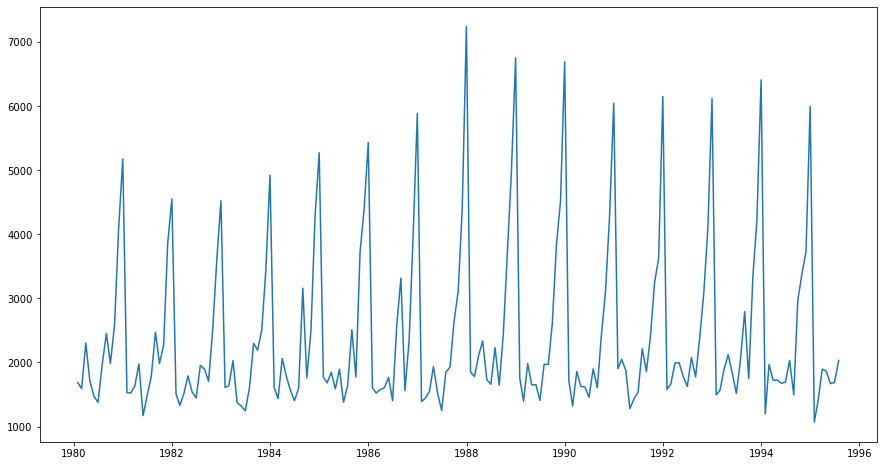

In [14]:
plt.figure(figsize=(15,8))
plt.plot(df['Sparkling']);

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Plot a boxplot to understand the spread of sales across different years and within different months across years.

<font color='blue'/><span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Yearly Boxplot

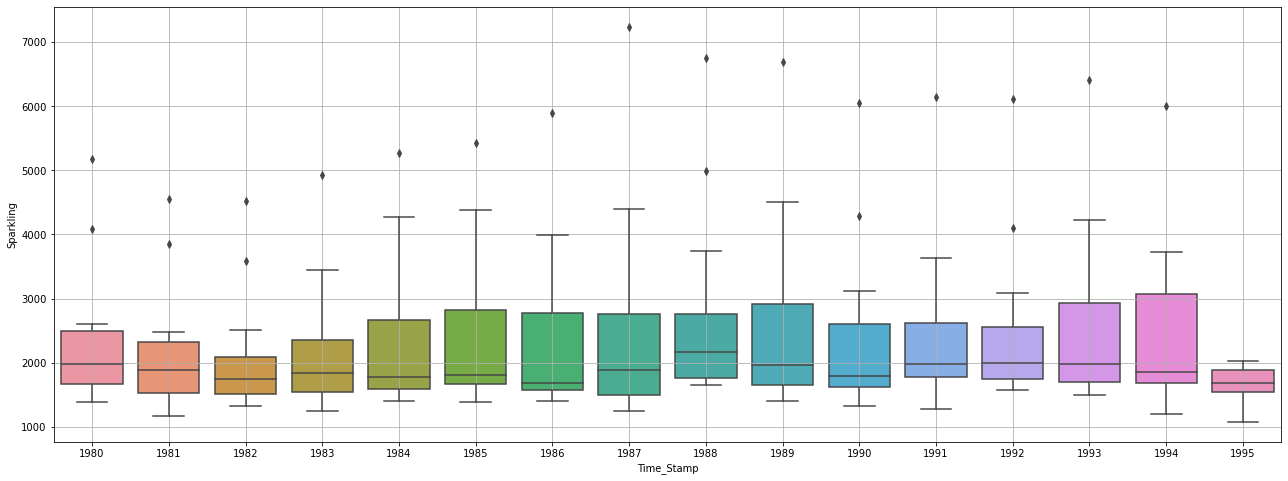

In [15]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.year,y = df['Sparkling'])
plt.grid();

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/><Font color='Blue'/>Monthly Plot

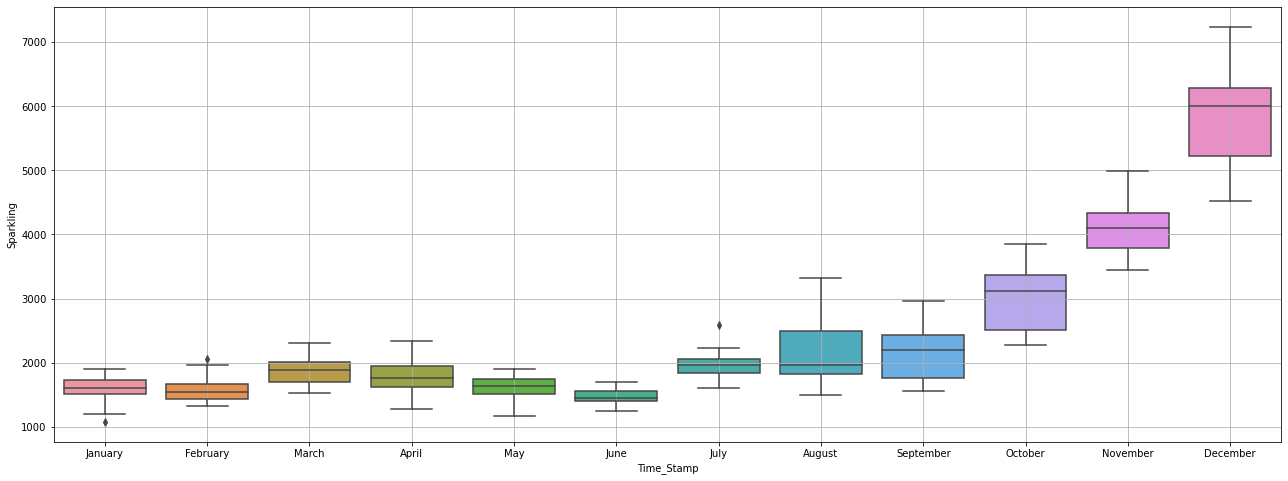

In [16]:
_, ax = plt.subplots(figsize=(22,8))
sns.boxplot(x = df.index.month_name(),y = df['Sparkling'])
plt.grid();

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/><font color='blue'/>Month wise Sales

In [17]:
from statsmodels.graphics.tsaplots import month_plot

In [18]:
monthly_sales_across_years = pd.pivot_table(df, values = 'Sparkling', columns = df.index.month, 
                                        index = df.index.year)
monthly_sales_across_years

Time_Stamp      1       2       3       4       5       6       7       8   \
Time_Stamp                                                                   
1980        1686.0  1591.0  2304.0  1712.0  1471.0  1377.0  1966.0  2453.0   
1981        1530.0  1523.0  1633.0  1976.0  1170.0  1480.0  1781.0  2472.0   
1982        1510.0  1329.0  1518.0  1790.0  1537.0  1449.0  1954.0  1897.0   
1983        1609.0  1638.0  2030.0  1375.0  1320.0  1245.0  1600.0  2298.0   
1984        1609.0  1435.0  2061.0  1789.0  1567.0  1404.0  1597.0  3159.0   
1985        1771.0  1682.0  1846.0  1589.0  1896.0  1379.0  1645.0  2512.0   
1986        1606.0  1523.0  1577.0  1605.0  1765.0  1403.0  2584.0  3318.0   
1987        1389.0  1442.0  1548.0  1935.0  1518.0  1250.0  1847.0  1930.0   
1988        1853.0  1779.0  2108.0  2336.0  1728.0  1661.0  2230.0  1645.0   
1989        1757.0  1394.0  1982.0  1650.0  1654.0  1406.0  1971.0  1968.0   
1990        1720.0  1321.0  1859.0  1628.0  1615.0  1457.0  1899.0  1605.0   
1991        1902.0  2049.0  1874.0  1279.0  1432.0  1540.0  2214.0  1857.0   
1992        1577.0  1667.0  1993.0  1997.0  1783.0  1625.0  2076.0  1773.0   
1993        1494.0  1564.0  1898.0  2121.0  1831.0  1515.0  2048.0  2795.0   
1994        1197.0  1968.0  1720.0  1725.0  1674.0  1693.0  2031.0  1495.0   
1995        1070.0  1402.0  1897.0  1862.0  1670.0  1688.0  2031.0     NaN   

Time_Stamp      9       10      11      12  
Time_Stamp                                  
1980        1984.0  2596.0  4087.0  5179.0  
1981        1981.0  2273.0  3857.0  4551.0  
1982        1706.0  2514.0  3593.0  4524.0  
1983        2191.0  2511.0  3440.0  4923.0  
1984        1759.0  2504.0  4273.0  5274.0  
1985        1771.0  3727.0  4388.0  5434.0  
1986        1562.0  2349.0  3987.0  5891.0  
1987        2638.0  3114.0  4405.0  7242.0  
1988        2421.0  3740.0  4988.0  6757.0  
1989        2608.0  3845.0  4514.0  6694.0  
1990        2424.0  3116.0  4286.0  6047.0  
1991        2408.0  3252.0  3627.0  6153.0  
1992        2377.0  3088.0  4096.0  6119.0  
1993        1749.0  3339.0  4227.0  6410.0  
1994        2968.0  3385.0  3729.0  5999.0  
1995           NaN     NaN     NaN     NaN

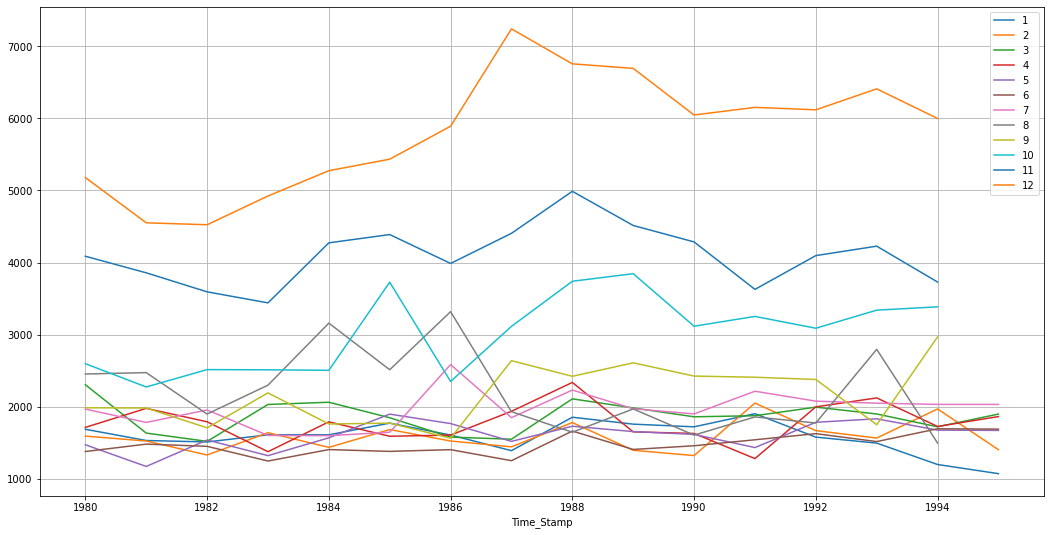

In [19]:
rcParams['figure.figsize'] = 18,9
monthly_sales_across_years.plot()
plt.grid()
plt.legend(loc='best');

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/><font color='blue'/>Plot the Empirical Cumulative Distribution

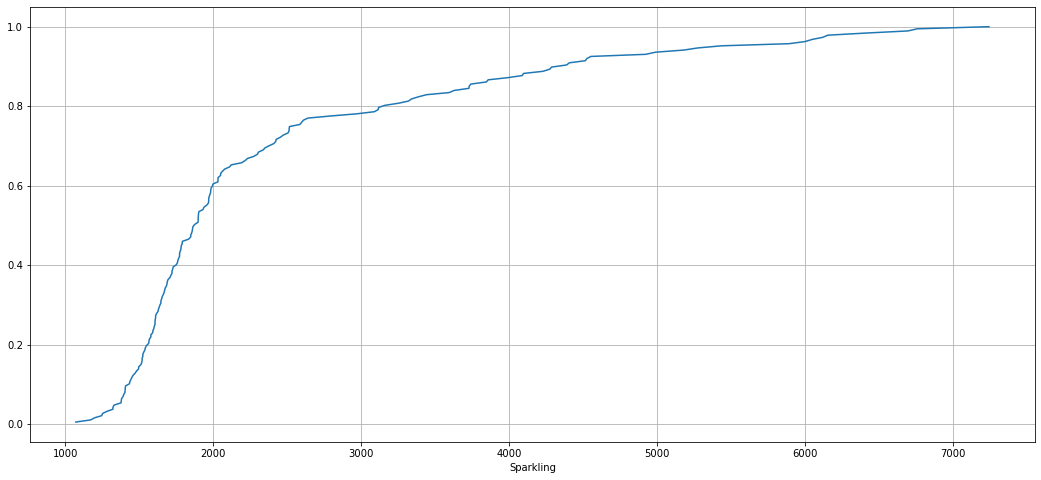

In [20]:
from statsmodels.distributions.empirical_distribution import ECDF

plt.figure(figsize = (18, 8))
cdf = ECDF(df['Sparkling'])
plt.plot(cdf.x, cdf.y, label = "statmodels");
plt.grid()
plt.xlabel('Sparkling');

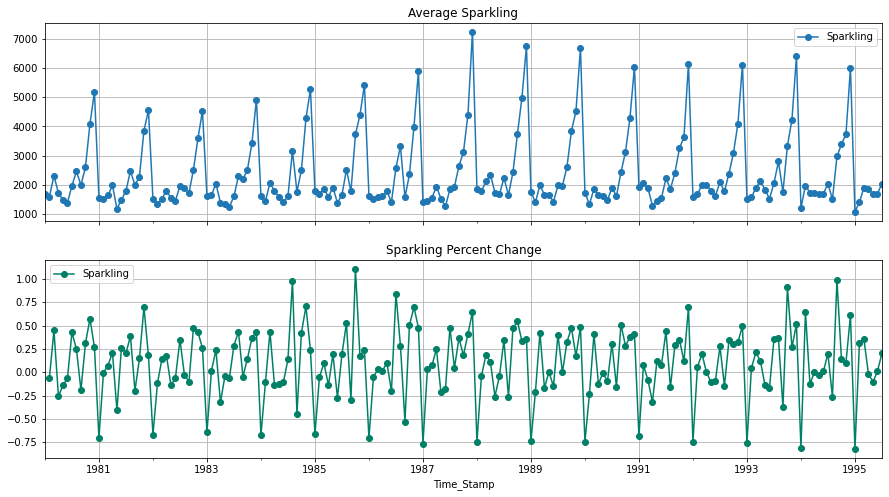

In [21]:
# group by date and get average Sales, and precent change
average    = df.groupby(df.index)["Sparkling"].mean()
pct_change = df.groupby(df.index)["Sparkling"].sum().pct_change()

fig, (axis1,axis2) = plt.subplots(2,1,sharex=True,figsize=(15,8))

# plot average RetailSales over time(year-month)
ax1 = average.plot(legend=True,ax=axis1,marker='o',title="Average Sparkling",grid=True)
ax1.set_xticks(range(len(average)))
ax1.set_xticklabels(average.index.tolist())
# plot precent change for RetailSales over time(year-month)
ax2 = pct_change.plot(legend=True,ax=axis2,marker='o',colormap="summer",title="Sparkling Percent Change",grid=True)

<span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Decompose the Time Series and plot the different components.

In [22]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [23]:
df.columns

Index(['YearMonth', 'Sparkling'], dtype='object')

In [24]:
df.isnull().count()

YearMonth    187
Sparkling    187
dtype: int64

In [25]:
df.isna().sum()

YearMonth    0
Sparkling    0
dtype: int64

In [26]:
df_yearly_sum = df.resample('A').sum()
df_yearly_sum.head()

Sparkling
Time_Stamp           
1980-12-31      28406
1981-12-31      26227
1982-12-31      25321
1983-12-31      26180
1984-12-31      28431

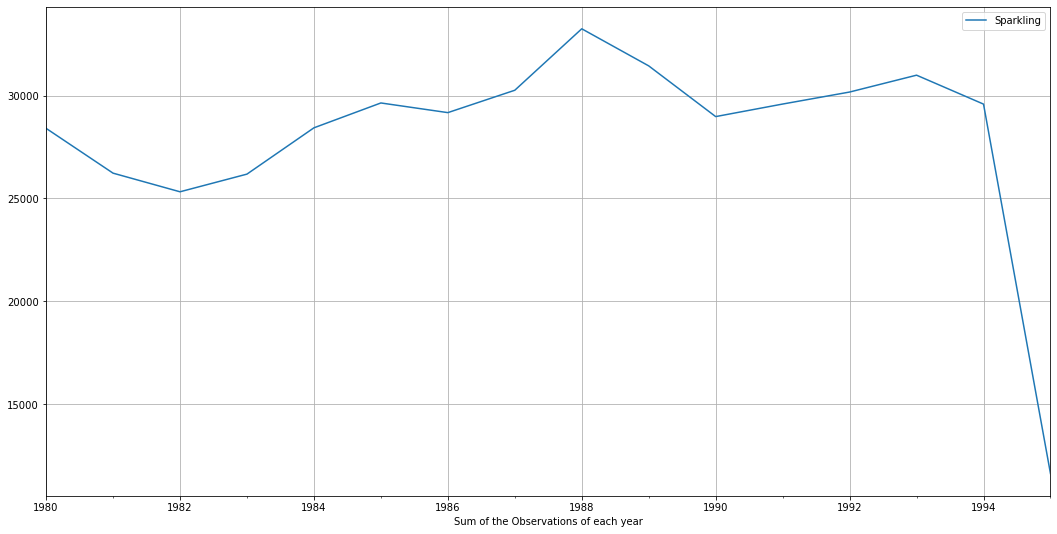

In [27]:
df_yearly_sum.plot();
plt.grid()
plt.xlabel('Sum of the Observations of each year');

In [28]:
df_yearly_mean = df.resample('Y').mean()
df_yearly_mean.head()

Sparkling
Time_Stamp             
1980-12-31  2367.166667
1981-12-31  2185.583333
1982-12-31  2110.083333
1983-12-31  2181.666667
1984-12-31  2369.250000

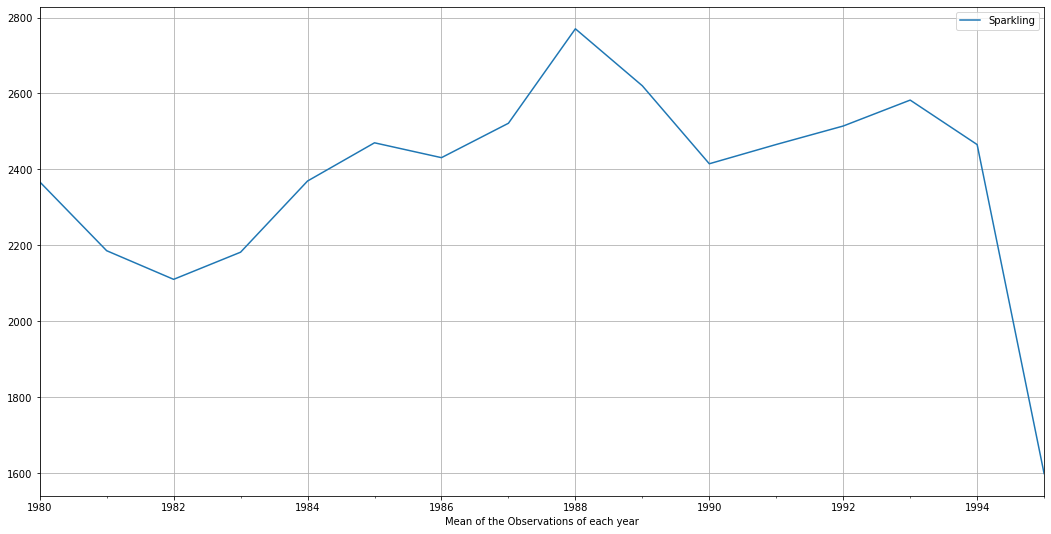

In [32]:
df_yearly_mean.plot();
plt.grid()
plt.xlabel('Mean of the Observations of each year');

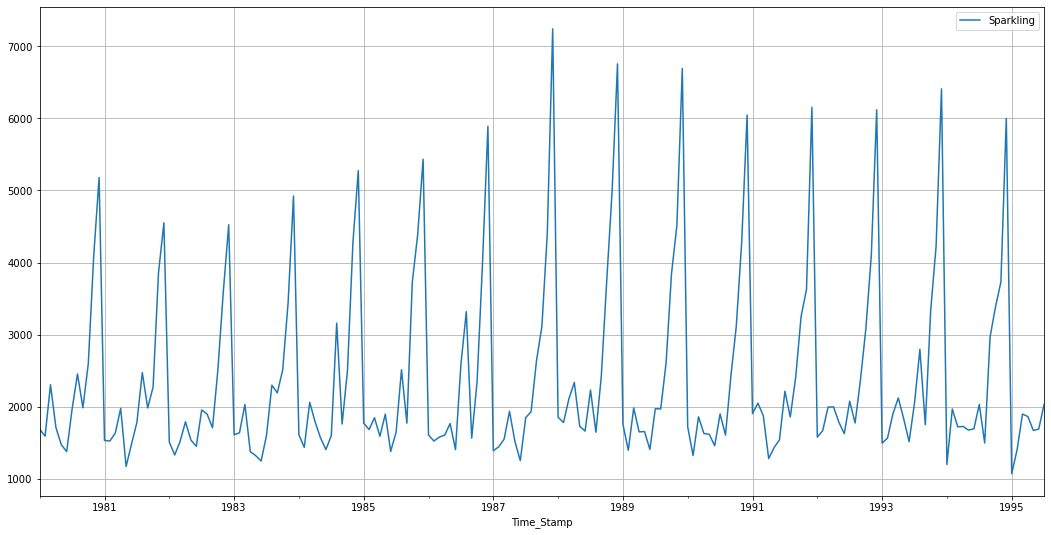

In [29]:
df.plot()
plt.grid();

In [30]:
df_quarterly_sum = df.resample('Q').sum()
df_quarterly_sum.head()

Sparkling
Time_Stamp           
1980-03-31       5581
1980-06-30       4560
1980-09-30       6403
1980-12-31      11862
1981-03-31       4686

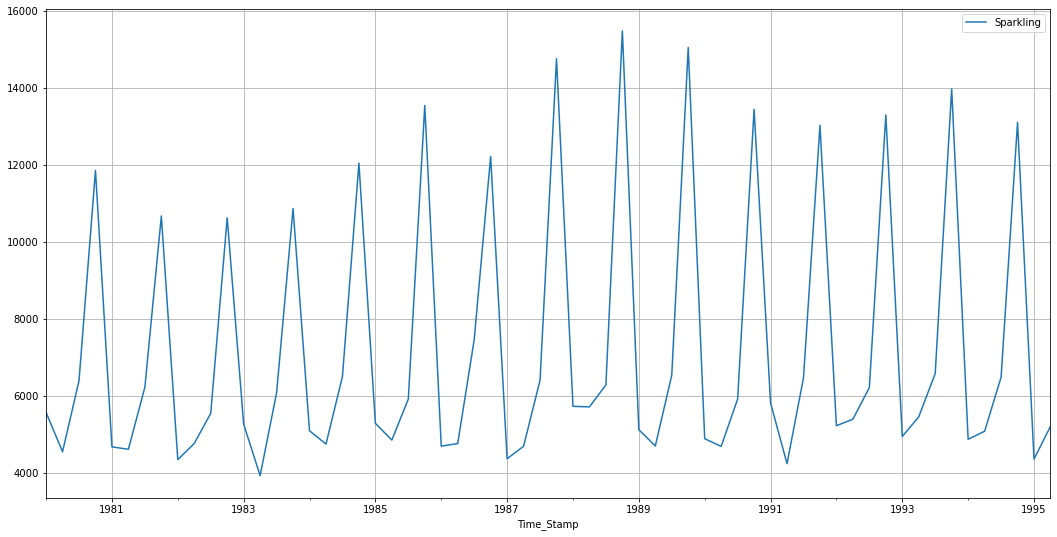

In [35]:
df_quarterly_sum.plot();
plt.grid()

In [31]:
df_quarterly_mean = df.resample('Q').mean()
df_quarterly_mean.head()

Sparkling
Time_Stamp             
1980-03-31  1860.333333
1980-06-30  1520.000000
1980-09-30  2134.333333
1980-12-31  3954.000000
1981-03-31  1562.000000

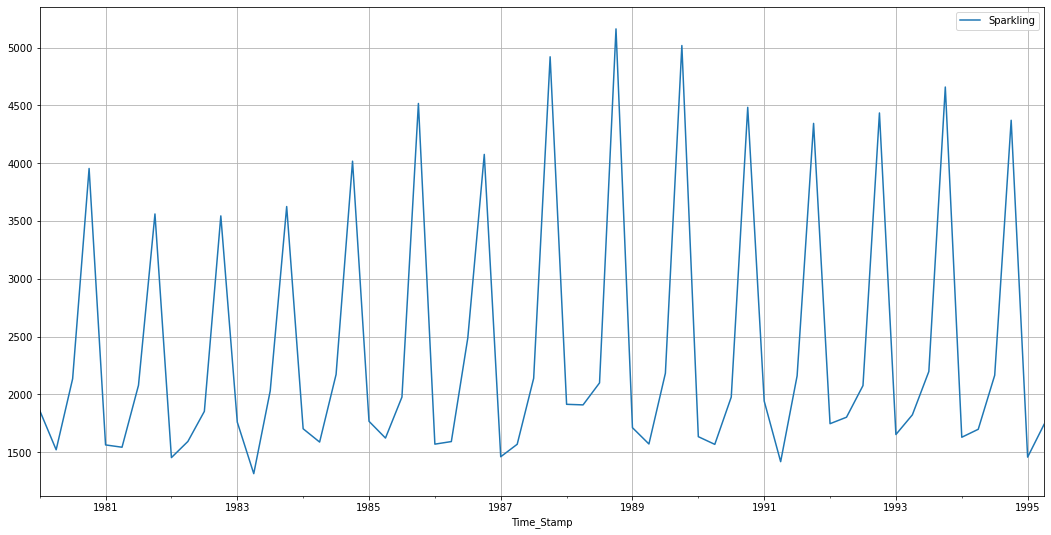

In [37]:
df_quarterly_mean.plot();
plt.grid()

In [32]:
df_daily_sum = df.resample('D').sum()
df_daily_sum

Sparkling
Time_Stamp           
1980-01-31       1686
1980-02-01          0
1980-02-02          0
1980-02-03          0
1980-02-04          0
...               ...
1995-07-27          0
1995-07-28          0
1995-07-29          0
1995-07-30          0
1995-07-31       2031

[5661 rows x 1 columns]

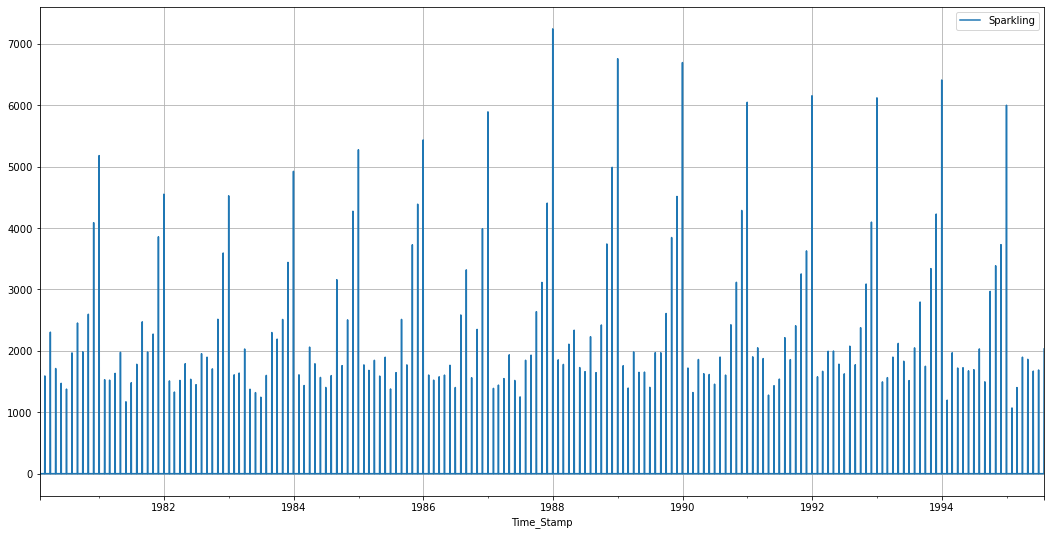

In [33]:
df_daily_sum.plot()
plt.grid();

In [34]:
df_decade_sum = df.resample('10Y').sum()
df_decade_sum

Sparkling
Time_Stamp           
1980-12-31      28406
1990-12-31     288893
2000-12-31     131953

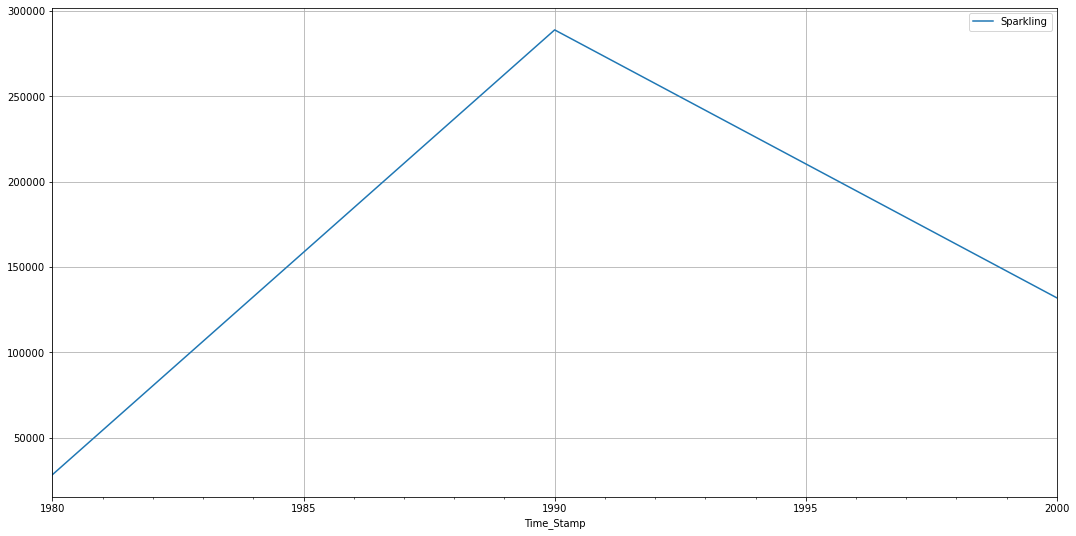

In [35]:
df_decade_sum.plot();
plt.grid()

In [36]:
from statsmodels.tsa.seasonal import seasonal_decompose

In [37]:
df["Time_Stamp"] = df.index.values

In [38]:
df = df[df.Time_Stamp.notnull()]

In [39]:
df.drop(["Time_Stamp"], axis=1, inplace=True)

<font color='Blue'/><span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Additive Decomposition

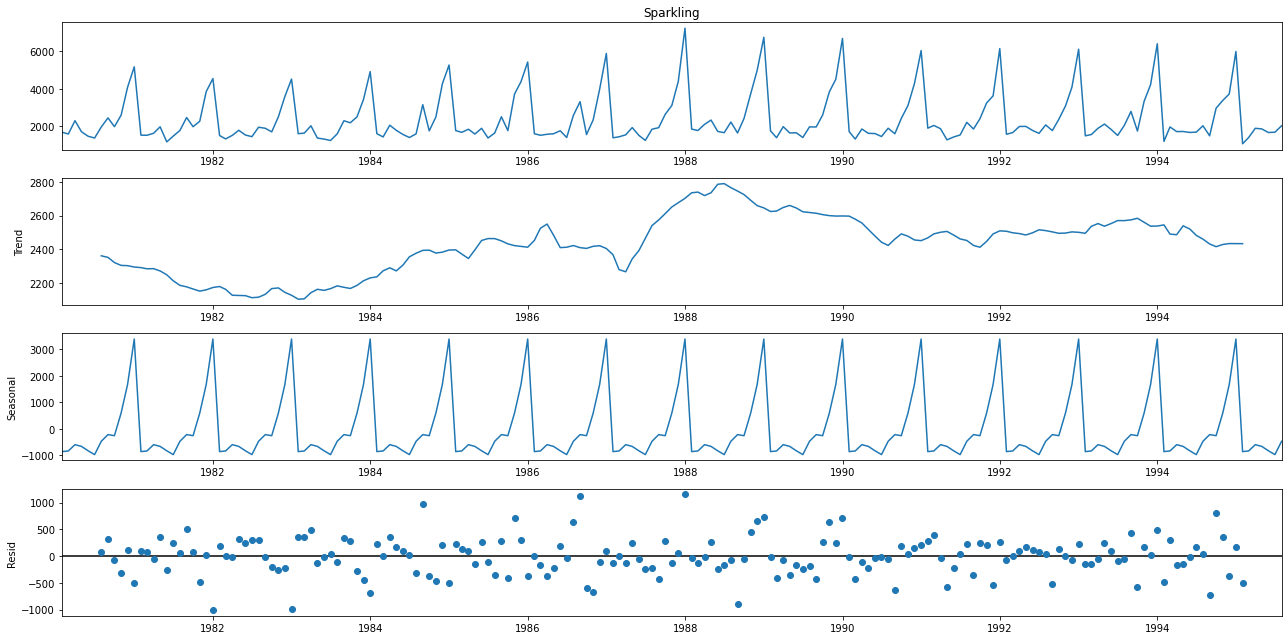

In [40]:
decomposition = seasonal_decompose(df['Sparkling'],model='additive')
decomposition.plot();

In [41]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    -854.260599
1980-02-29    -830.350678
1980-03-31    -592.356630
1980-04-30    -658.490559
1980-05-31    -824.416154
1980-06-30    -967.434011
1980-07-31    -465.502265
1980-08-31    -214.332821
1980-09-30    -254.677265
1980-10-31     599.769957
1980-11-30    1675.067179
1980-12-31    3386.983846
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31           NaN
1980-02-29           NaN
1980-03-31           NaN
1980-04-30           NaN
1980-05-31           NaN
1980-06-30           NaN
1980-07-31     70.835599
1980-08-31    315.999487
1980-09-30    -81.864401
1980-10-31   -307.3532

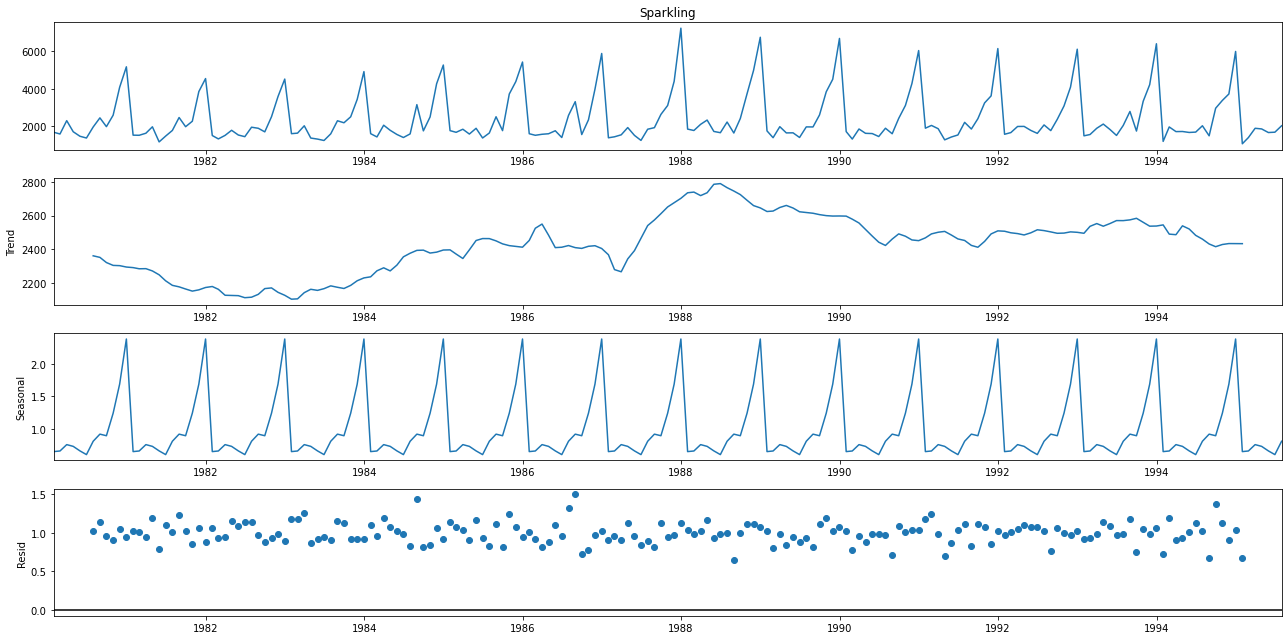

In [42]:
decomposition = seasonal_decompose(df['Sparkling'],model='multiplicative')
decomposition.plot();

In [43]:
trend = decomposition.trend
seasonality = decomposition.seasonal
residual = decomposition.resid

print('Trend','\n',trend.head(12),'\n')
print('Seasonality','\n',seasonality.head(12),'\n')
print('Residual','\n',residual.head(12),'\n')

Trend 
 Time_Stamp
1980-01-31            NaN
1980-02-29            NaN
1980-03-31            NaN
1980-04-30            NaN
1980-05-31            NaN
1980-06-30            NaN
1980-07-31    2360.666667
1980-08-31    2351.333333
1980-09-30    2320.541667
1980-10-31    2303.583333
1980-11-30    2302.041667
1980-12-31    2293.791667
Name: trend, dtype: float64 

Seasonality 
 Time_Stamp
1980-01-31    0.649843
1980-02-29    0.659214
1980-03-31    0.757440
1980-04-30    0.730351
1980-05-31    0.660609
1980-06-30    0.603468
1980-07-31    0.809164
1980-08-31    0.918822
1980-09-30    0.894367
1980-10-31    1.241789
1980-11-30    1.690158
1980-12-31    2.384776
Name: seasonal, dtype: float64 

Residual 
 Time_Stamp
1980-01-31         NaN
1980-02-29         NaN
1980-03-31         NaN
1980-04-30         NaN
1980-05-31         NaN
1980-06-30         NaN
1980-07-31    1.029230
1980-08-31    1.135407
1980-09-30    0.955954
1980-10-31    0.907513
1980-11-30    1.050423
1980-12-31    0.946770
Name: r

<font color='Blue'/><span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Test for Stationarity

In [44]:
## Test for stationarity of the series - Dicky Fuller test

from statsmodels.tsa.stattools import adfuller
def test_stationarity(timeseries):
    
    #Determing rolling statistics
    rolmean = timeseries.rolling(window=7).mean() #determining the rolling mean
    rolstd = timeseries.rolling(window=7).std()   #determining the rolling standard deviation

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)
    
    #Perform Dickey-Fuller test:
    print ('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic','p-value','#Lags Used','Number of Observations Used'])
    for key,value in dftest[4].items():
        dfoutput['Critical Value (%s)'%key] = value
    print (dfoutput,'\n')

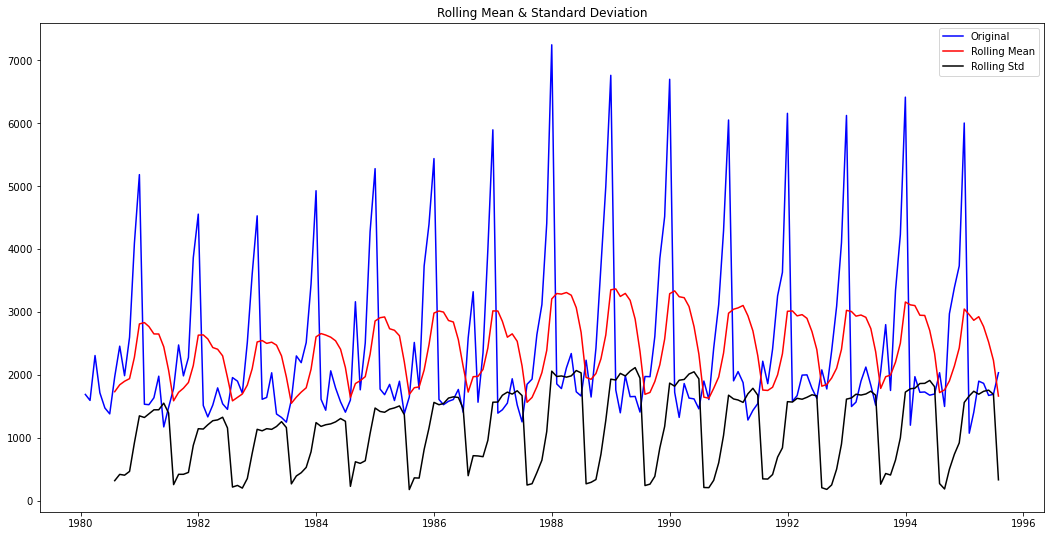

Results of Dickey-Fuller Test:
Test Statistic                  -1.360497
p-value                          0.601061
#Lags Used                      11.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [45]:
test_stationarity(df['Sparkling'])

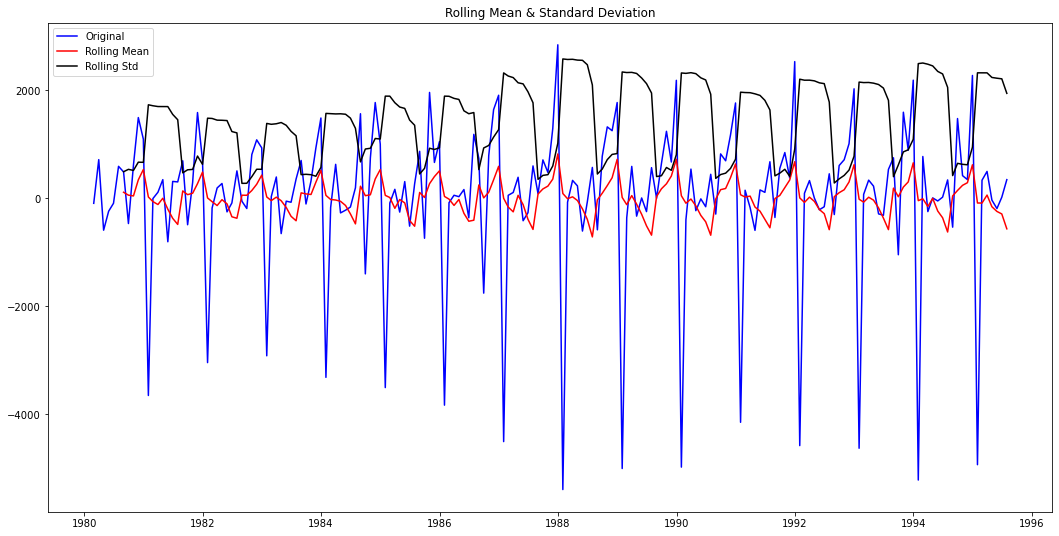

Results of Dickey-Fuller Test:
Test Statistic                 -45.050301
p-value                          0.000000
#Lags Used                      10.000000
Number of Observations Used    175.000000
Critical Value (1%)             -3.468280
Critical Value (5%)             -2.878202
Critical Value (10%)            -2.575653
dtype: float64 



In [46]:
test_stationarity(df['Sparkling'].diff().dropna())

<font color='Blue'/><span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Plot the Autocorrelation and the Partial Autocorrelation function plots on the whole data.

In [47]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

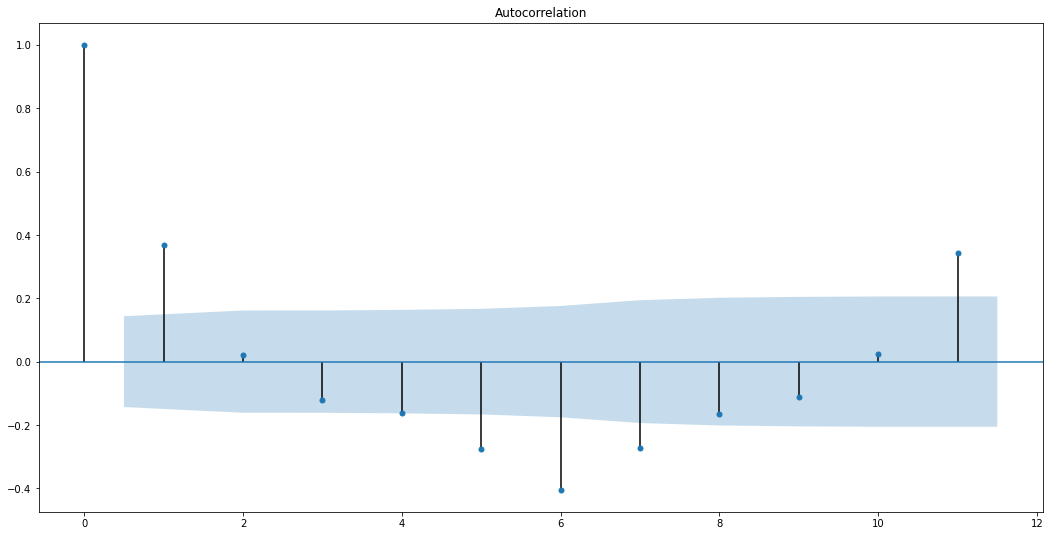

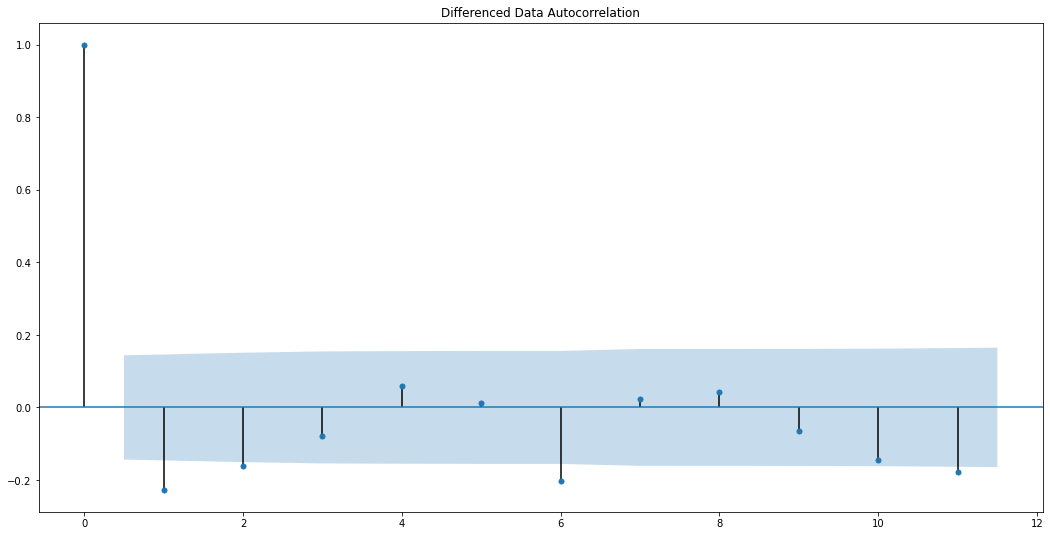

In [48]:
plot_acf(df['Sparkling'],lags=11)
plot_acf(df['Sparkling'].diff().dropna(),lags=11,title='Differenced Data Autocorrelation')
plt.show()

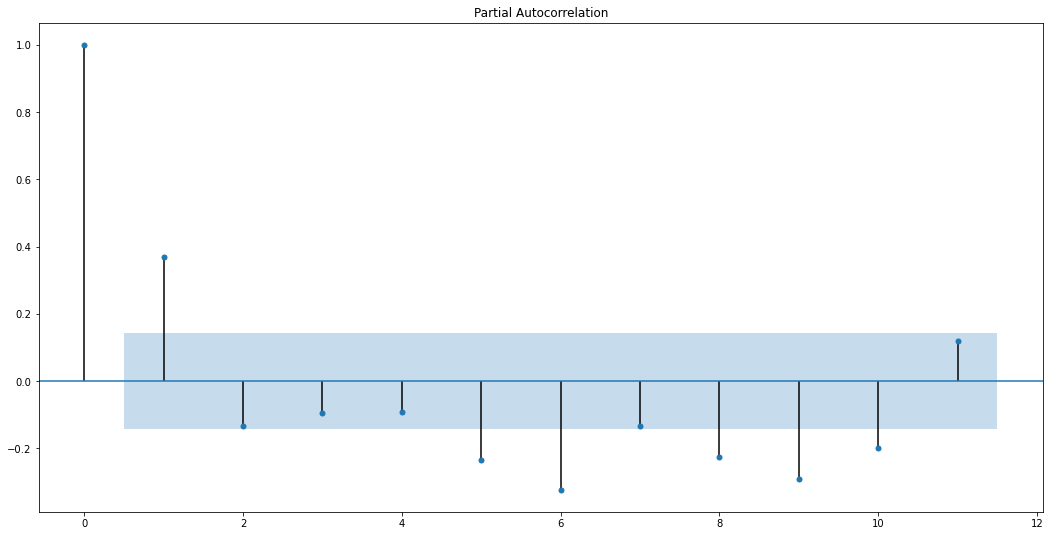

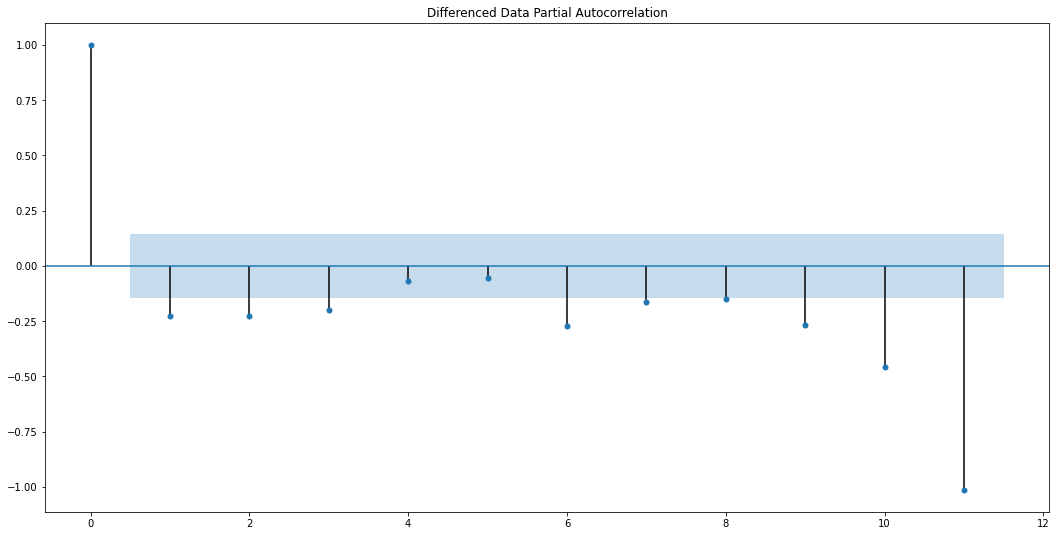

In [49]:
plot_pacf(df['Sparkling'],lags=11)
plot_pacf(df['Sparkling'].diff().dropna(),lags=11,title='Differenced Data Partial Autocorrelation')
plt.show()

<font color='Blue'/><span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Split the data into train and test and plot the training and test data.

In [50]:
train=df[df.index.year < 1991]
test=df[df.index.year >= 1991]

In [51]:
from IPython.display import display

In [52]:
print('First few rows of Training Data')
display(train.head())
print('Last few rows of Training Data')
display(train.tail())
print('First few rows of Test Data')
display(test.head())
print('Last few rows of Test Data')
display(test.tail())

First few rows of Training Data


YearMonth  Sparkling
Time_Stamp                     
1980-01-31   1980-01       1686
1980-02-29   1980-02       1591
1980-03-31   1980-03       2304
1980-04-30   1980-04       1712
1980-05-31   1980-05       1471

Last few rows of Training Data


YearMonth  Sparkling
Time_Stamp                     
1990-08-31   1990-08       1605
1990-09-30   1990-09       2424
1990-10-31   1990-10       3116
1990-11-30   1990-11       4286
1990-12-31   1990-12       6047

First few rows of Test Data


YearMonth  Sparkling
Time_Stamp                     
1991-01-31   1991-01       1902
1991-02-28   1991-02       2049
1991-03-31   1991-03       1874
1991-04-30   1991-04       1279
1991-05-31   1991-05       1432

Last few rows of Test Data


YearMonth  Sparkling
Time_Stamp                     
1995-03-31   1995-03       1897
1995-04-30   1995-04       1862
1995-05-31   1995-05       1670
1995-06-30   1995-06       1688
1995-07-31   1995-07       2031

In [53]:
print(train.shape)
print(test.shape)

(132, 2)
(55, 2)


<font color='Blue'/><span style="font-family:Palatino Linotype; font-size:1.3em;"><B/><U/>Check for stationarity of the Training Data Time Series

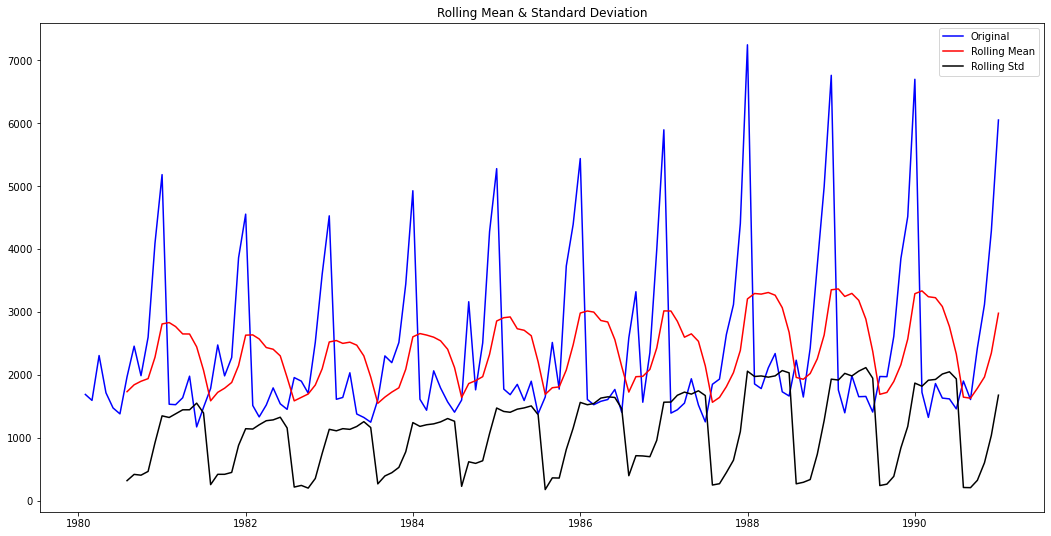

Results of Dickey-Fuller Test:
Test Statistic                  -1.208926
p-value                          0.669744
#Lags Used                      12.000000
Number of Observations Used    119.000000
Critical Value (1%)             -3.486535
Critical Value (5%)             -2.886151
Critical Value (10%)            -2.579896
dtype: float64 



In [62]:
test_stationarity(train['Sparkling'])

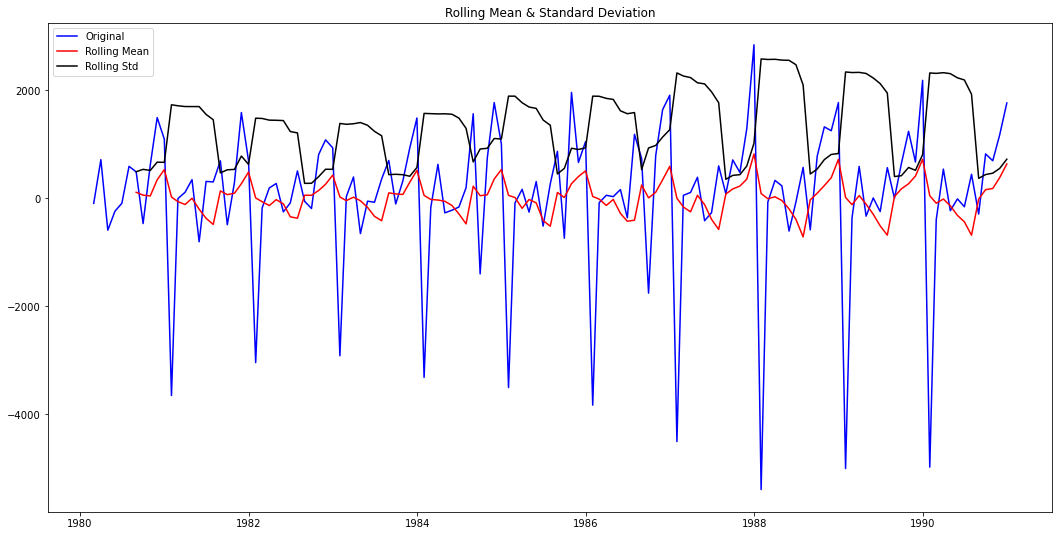

Results of Dickey-Fuller Test:
Test Statistic                -8.005007e+00
p-value                        2.280104e-12
#Lags Used                     1.100000e+01
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64 



In [54]:
test_stationarity(train['Sparkling'].diff().dropna())

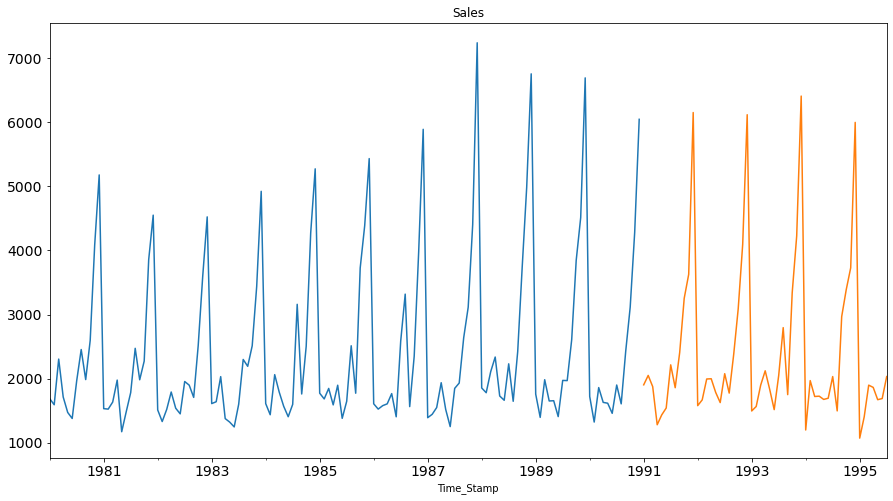

In [55]:
train['Sparkling'].plot(figsize=(15,8), title= 'Sales', fontsize=14)
test['Sparkling'].plot(figsize=(15,8), title= 'Sales', fontsize=14)

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 1: Regression on Time

In [56]:
df1         =   df.copy() # Make a copy

time        = [i+1 for i in range(len(df))]
df1['time'] = time
monthDf     = df1[['YearMonth']]

df1.drop('YearMonth', axis=1, inplace=True)
df1.head(2)

Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2

In [57]:
train=df1[df.index.year < 1991]
test=df1[df.index.year >= 1991]

In [58]:
x_train = train.drop('Sparkling', axis=1)
x_test  = test.drop('Sparkling', axis=1)
y_train = train[['Sparkling']]
y_test  = test[['Sparkling']]

In [59]:
from sklearn.linear_model import LinearRegression

In [60]:
model = LinearRegression()

In [61]:
model.fit(x_train,y_train)

LinearRegression()

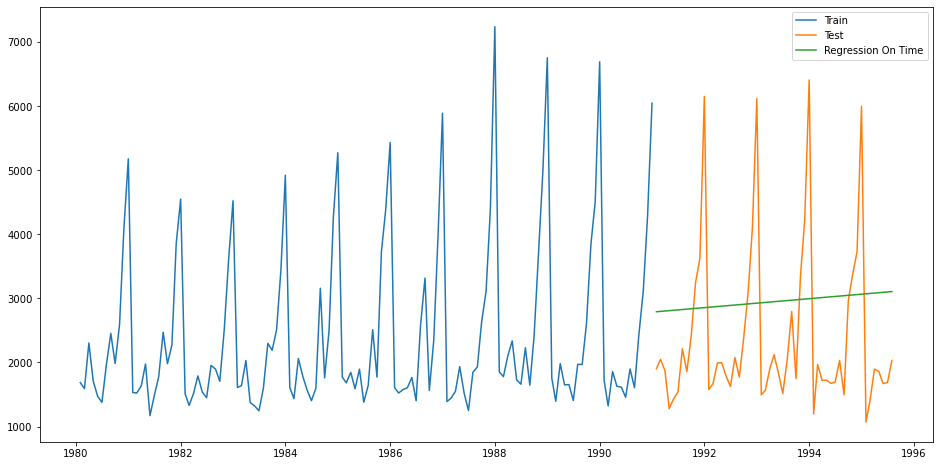

In [62]:
predictions         = model.predict(x_test)
y_test['RegOnTime'] = predictions

plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTime'], label='Regression On Time')
plt.legend(loc='best')

In [63]:
train_time = [i+1 for i in range(len(train))]
test_time = [i+133 for i in range(len(test))]
print('Training Time instance','\n',train_time)
print('Test Time instance','\n',test_time)

Training Time instance 
 [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132]
Test Time instance 
 [133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187]


In [64]:
LinearRegression_train = train.copy()
LinearRegression_test = test.copy()

In [65]:
LinearRegression_train['time'] = train_time
LinearRegression_test['time'] = test_time

print('First few rows of Training Data','\n',LinearRegression_train.head(),'\n')
print('Last few rows of Training Data','\n',LinearRegression_train.tail(),'\n')
print('First few rows of Test Data','\n',LinearRegression_test.head(),'\n')
print('Last few rows of Test Data','\n',LinearRegression_test.tail(),'\n')

First few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1980-01-31       1686     1
1980-02-29       1591     2
1980-03-31       2304     3
1980-04-30       1712     4
1980-05-31       1471     5 

Last few rows of Training Data 
             Sparkling  time
Time_Stamp                 
1990-08-31       1605   128
1990-09-30       2424   129
1990-10-31       3116   130
1990-11-30       4286   131
1990-12-31       6047   132 

First few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1991-01-31       1902   133
1991-02-28       2049   134
1991-03-31       1874   135
1991-04-30       1279   136
1991-05-31       1432   137 

Last few rows of Test Data 
             Sparkling  time
Time_Stamp                 
1995-03-31       1897   183
1995-04-30       1862   184
1995-05-31       1670   185
1995-06-30       1688   186
1995-07-31       2031   187 



In [66]:
lr = LinearRegression()

In [67]:
lr.fit(LinearRegression_train[['time']],LinearRegression_train['Sparkling'].values)

LinearRegression()

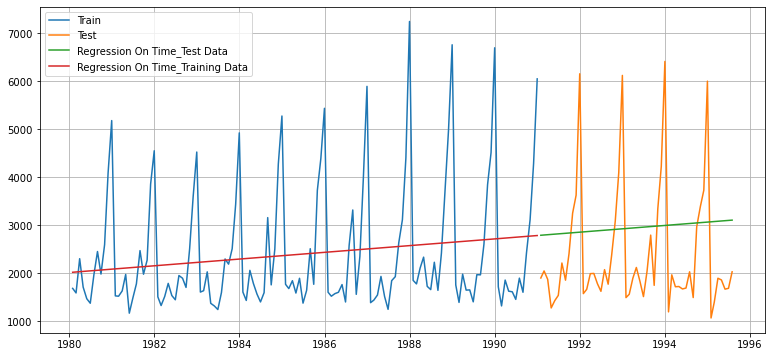

In [68]:
train_predictions_model1         = lr.predict(LinearRegression_train[['time']])
LinearRegression_train['RegOnTime'] = train_predictions_model1

test_predictions_model1         = lr.predict(LinearRegression_test[['time']])
LinearRegression_test['RegOnTime'] = test_predictions_model1

plt.figure(figsize=(13,6))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(LinearRegression_test['RegOnTime'], label='Regression On Time_Test Data')
plt.plot(LinearRegression_train['RegOnTime'], label='Regression On Time_Training Data')
plt.legend(loc='best')
plt.grid();

In [69]:
from math import sqrt

In [70]:
from   sklearn.metrics   import mean_squared_error

In [71]:
def MAPE(y, yhat): 
    y, yhat = np.array(y), np.array(yhat)
    try:
        mape =  round(np.sum(np.abs(yhat - y)) / np.sum(y) * 100,2)
    except:
        print("Observed values are empty")
        mape = np.nan
    return mape

In [72]:
LinearRegression_RMSE = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTime))
LinearRegression_RMSE = round(LinearRegression_RMSE, 3)
LinearRegression_MAPE = MAPE(test.Sparkling, y_test.RegOnTime)
print("For RegressionOnTime,  RMSE is %3.3f MAPE is %3.2f" %(LinearRegression_RMSE, LinearRegression_MAPE))

For RegressionOnTime,  RMSE is 1389.135 MAPE is 50.15


In [73]:
resultsDf = pd.DataFrame({'Method':['RegressionOnTime'], 'Test_RMSE': [LinearRegression_RMSE], 'Test_MAPE' : [LinearRegression_MAPE]})
resultsDf

Method  Test_RMSE  Test_MAPE
0  RegressionOnTime   1389.135      50.15

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 2: Regression on Time With Seasonal Components

In [74]:
time = [i+1 for i in range(len(df))]
df1 = df.copy()
df1['time'] = time
print(df1.head())
print(df1.shape[0])
monthSeasonality = ['m1', 'm2', 'm3', 'm4', 'm5', 'm6', 'm7', 'm8', 'm9', 'm10', 'm11', 'm12']

           YearMonth  Sparkling  time
Time_Stamp                           
1980-01-31   1980-01       1686     1
1980-02-29   1980-02       1591     2
1980-03-31   1980-03       2304     3
1980-04-30   1980-04       1712     4
1980-05-31   1980-05       1471     5
187


In [75]:
monthDf = df1[['YearMonth']]
df1.drop('YearMonth', axis=1, inplace=True)

In [79]:
df1Complete = pd.get_dummies(df1, drop_first=True)
df1Complete.head().T

Time_Stamp  1980-01-31  1980-02-29  1980-03-31  1980-04-30  1980-05-31
Sparkling         1686        1591        2304        1712        1471
time                 1           2           3           4           5

In [80]:
train=df1Complete[df.index.year < 1991]
test=df1Complete[df.index.year >= 1991]

In [81]:
x_train  = train.drop('Sparkling', axis=1)
x_test   = test.drop('Sparkling', axis=1)
y_train  = train[['Sparkling']]
y_test   = test[['Sparkling']]

In [82]:
model    = LinearRegression()

In [83]:
model.fit(x_train, y_train)

LinearRegression()

In [84]:
predictions = model.predict(x_test)

In [85]:
y_test['RegOnTimeSeasonal'] = predictions

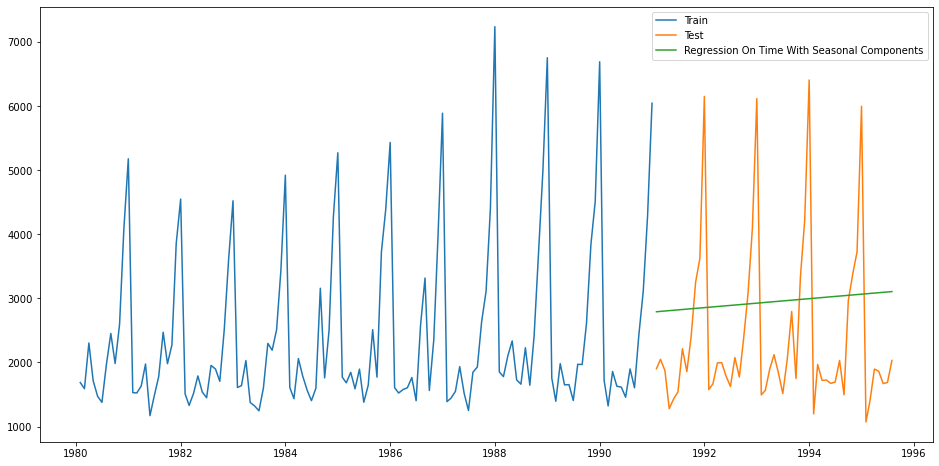

In [86]:
plt.figure(figsize=(16,8))
plt.plot( train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_test['RegOnTimeSeasonal'], label='Regression On Time With Seasonal Components')
plt.legend(loc='best')

In [87]:
Seasonal_RMSE = sqrt(mean_squared_error(test.Sparkling, y_test.RegOnTimeSeasonal))
Seasonal_RMSE = round(Seasonal_RMSE, 3)
Seasonal_MAPE = MAPE(test.Sparkling, y_test.RegOnTimeSeasonal)
print("For RegOnTimeSeasonal,  RMSE is %3.3f MAPE is %3.2f" %(Seasonal_RMSE, Seasonal_MAPE))

For RegOnTimeSeasonal,  RMSE is 1389.135 MAPE is 50.15


In [88]:
resultsDf_1 = pd.DataFrame({'Method':['RegressionOnTimeSeasonal'], 'Test_RMSE': [Seasonal_RMSE], 'Test_MAPE' : [Seasonal_MAPE]})
resultsDf = pd.concat([resultsDf, resultsDf_1])
resultsDf

Method  Test_RMSE  Test_MAPE
0          RegressionOnTime   1389.135      50.15
0  RegressionOnTimeSeasonal   1389.135      50.15

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 3: Naive Approach: 𝑦̂ 𝑡+1=𝑦𝑡

In [89]:
dd= np.asarray(train.Sparkling)

In [90]:
y_hat = test.copy()

In [91]:
y_hat['naive'] = dd[len(dd)-1]

Text(0.5, 1.0, 'Naive Forecast')

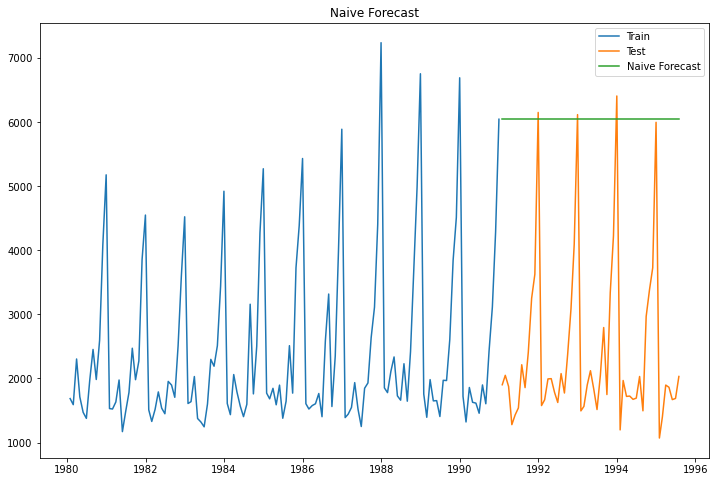

In [92]:
plt.figure(figsize=(12,8))
plt.plot(train.index, train['Sparkling'], label='Train')
plt.plot(test.index,test['Sparkling'], label='Test')
plt.plot(y_hat.index,y_hat['naive'], label='Naive Forecast')
plt.legend(loc='best')
plt.title("Naive Forecast")

In [93]:
Naive_RMSE = sqrt(mean_squared_error(test.Sparkling, y_hat.naive))
Naive_RMSE = round(Naive_RMSE, 3)
Naive_MAPE = MAPE(test.Sparkling, y_hat.naive)
print("For Naive model,  RMSE is %3.3f MAPE is %3.2f" %(Naive_RMSE, Naive_MAPE))

For Naive model,  RMSE is 3864.279 MAPE is 152.87


In [94]:
resultsDf_3 = pd.DataFrame({'Method':['Naive model'], 'Test_RMSE': [Naive_RMSE], 'Test_MAPE' : [Naive_MAPE]})
resultsDf = pd.concat([resultsDf, resultsDf_3])
resultsDf

Method  Test_RMSE  Test_MAPE
0          RegressionOnTime   1389.135      50.15
0  RegressionOnTimeSeasonal   1389.135      50.15
0               Naive model   3864.279     152.87

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 4: Simple Average

In [95]:
y_hat_avg = test.copy()

In [96]:
y_hat_avg['avg_forecast'] = train['Sparkling'].mean()

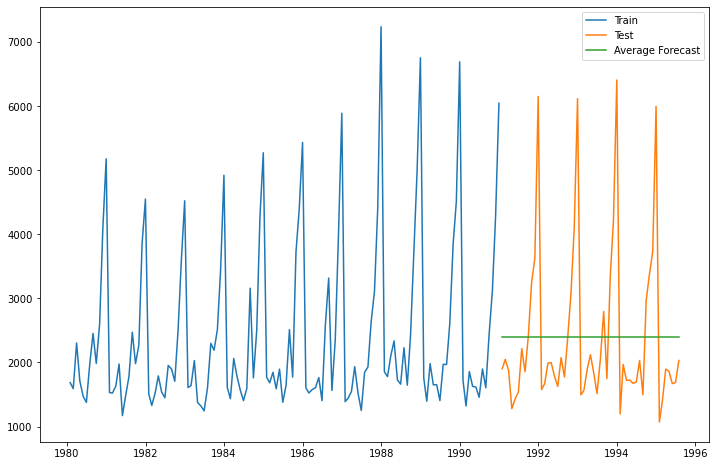

In [97]:
plt.figure(figsize=(12,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['avg_forecast'], label='Average Forecast')
plt.legend(loc='best')

In [98]:
SimpleAvg_RMSE = sqrt(mean_squared_error(test.Sparkling, y_hat_avg.avg_forecast))
SimpleAvg_RMSE = round(SimpleAvg_RMSE, 3)
SimpleAvg_MAPE = MAPE(test.Sparkling, y_hat_avg.avg_forecast)
print("For Simple Average model,  RMSE is %3.3f MAPE is %3.2f" %(SimpleAvg_RMSE, SimpleAvg_MAPE))

For Simple Average model,  RMSE is 1275.082 MAPE is 38.90


In [99]:
resultsDf_4 = pd.DataFrame({'Method':['Simple Average'], 'Test_RMSE': [SimpleAvg_RMSE], 'Test_MAPE' : [SimpleAvg_MAPE]})
resultsDf = pd.concat([resultsDf, resultsDf_4])
resultsDf

Method  Test_RMSE  Test_MAPE
0          RegressionOnTime   1389.135      50.15
0  RegressionOnTimeSeasonal   1389.135      50.15
0               Naive model   3864.279     152.87
0            Simple Average   1275.082      38.90

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 5: Moving Average(MA)

In [100]:
df2 = df.copy()

In [101]:
df2['moving_avg_forecast_4']  = df['Sparkling'].rolling(4).mean()
df2['moving_avg_forecast_6']  = df['Sparkling'].rolling(6).mean()
df2['moving_avg_forecast_8']  = df['Sparkling'].rolling(8).mean()
df2['moving_avg_forecast_12'] = df['Sparkling'].rolling(12).mean()

For Simple Average model, moving_avg_forecast_4  RMSE is 1156.590 MAPE is 35.96
For Simple Average model, moving_avg_forecast_6  RMSE is 1283.927 MAPE is 43.86
For Simple Average model, moving_avg_forecast_8  RMSE is 1342.568 MAPE is 46.46
For Simple Average model, moving_avg_forecast_12  RMSE is 1267.925 MAPE is 40.19


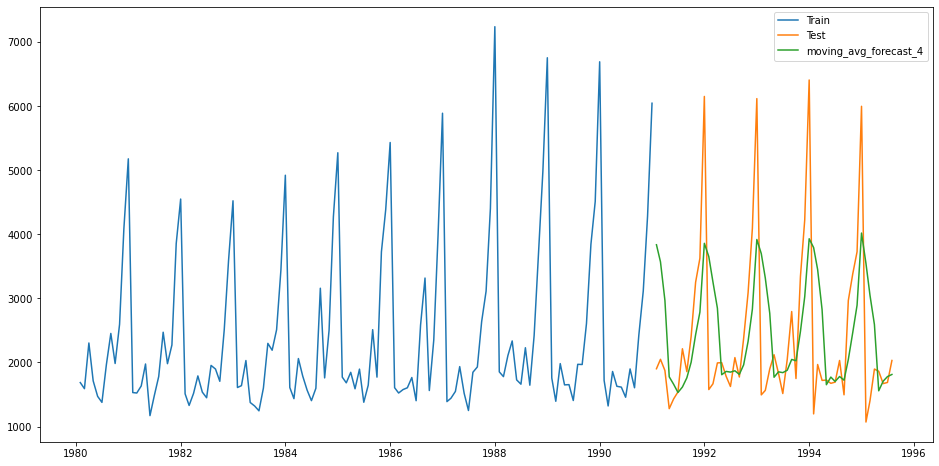

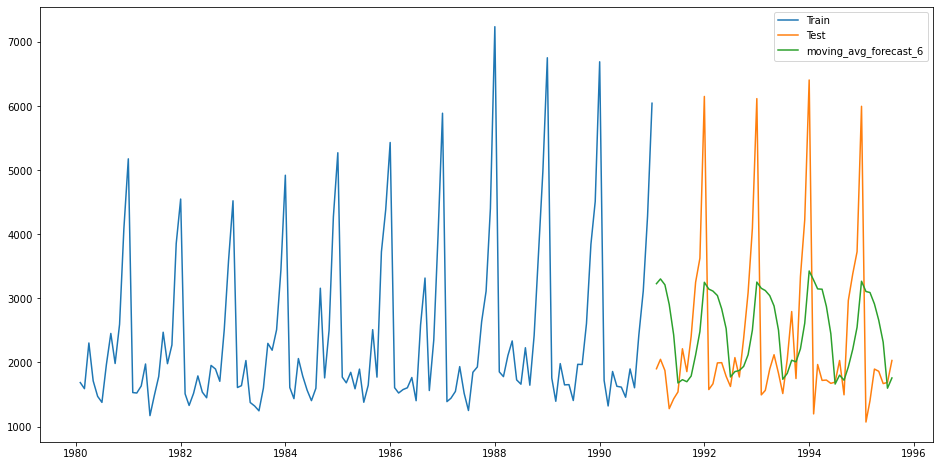

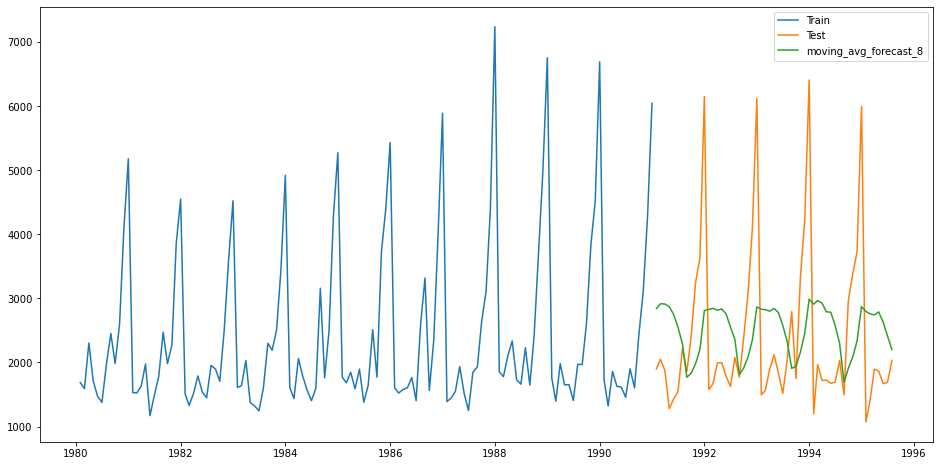

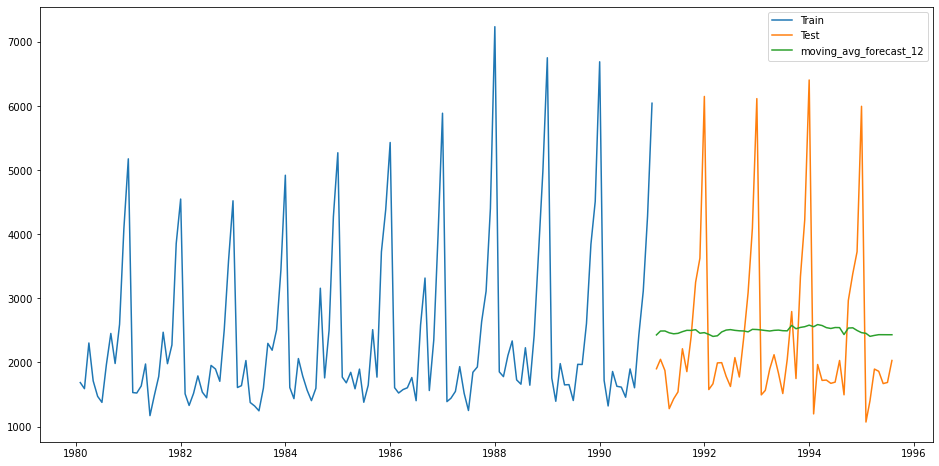

In [102]:
cols = ['moving_avg_forecast_4','moving_avg_forecast_6','moving_avg_forecast_8','moving_avg_forecast_12']

#Creating train and test set 
train=df2[df.index.year < 1991]
test=df2[df.index.year >= 1991]

y_hat_avg = test.copy()

for col_name in cols:
    
    plt.figure(figsize=(16,8))
    plt.plot(train['Sparkling'], label='Train')
    plt.plot(test['Sparkling'], label='Test')
    plt.plot(y_hat_avg[col_name], label = col_name)
    plt.legend(loc = 'best')

    MovingAvg_RMSE = sqrt(mean_squared_error(test.Sparkling, y_hat_avg[col_name]))
    MovingAvg_RMSE = round(MovingAvg_RMSE, 3)
    MovingAvg_MAPE = MAPE(test.Sparkling, y_hat_avg[col_name])
    print("For Simple Average model, %s  RMSE is %3.3f MAPE is %3.2f" %(col_name, MovingAvg_RMSE, MovingAvg_MAPE))
    
    #Defining the data frame with the model evaluation parameters

    resultsDf_5 = pd.DataFrame({'Method':[col_name], 'Test_RMSE': [MovingAvg_RMSE], 'Test_MAPE' : [MovingAvg_RMSE]})
    resultsDf = pd.concat([resultsDf, resultsDf_5])

In [103]:
print(resultsDf)

                     Method  Test_RMSE  Test_MAPE
0          RegressionOnTime   1389.135     50.150
0  RegressionOnTimeSeasonal   1389.135     50.150
0               Naive model   3864.279    152.870
0            Simple Average   1275.082     38.900
0     moving_avg_forecast_4   1156.590   1156.590
0     moving_avg_forecast_6   1283.927   1283.927
0     moving_avg_forecast_8   1342.568   1342.568
0    moving_avg_forecast_12   1267.925   1267.925


<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 6: Simple Exponential Smoothing

In [104]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

In [105]:
df3 = df.copy()

In [106]:
SES_train = df3[df.index.year < 1991]
SES_test = df3[df.index.year >= 1991]

In [107]:
model = SimpleExpSmoothing(SES_train['Sparkling'])

In [108]:
model_fit = model.fit(optimized = True)

In [109]:
model_fit.params

{'smoothing_level': 0.0,
 'smoothing_slope': nan,
 'smoothing_seasonal': nan,
 'damping_slope': nan,
 'initial_level': 2403.7699592849744,
 'initial_slope': nan,
 'initial_seasons': array([], dtype=float64),
 'use_boxcox': False,
 'lamda': None,
 'remove_bias': False}

In [110]:
print('')
print('== Simple Exponential Smoothing ')
print('')

print('')
print('Smoothing Level', np.round(model_fit.params['smoothing_level'], 4))
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


== Simple Exponential Smoothing 


Smoothing Level 0.0
Initial Level 2403.77



In [111]:
SES_train['predict'] = model_fit.fittedvalues
SES_train.head()

YearMonth  Sparkling      predict
Time_Stamp                                  
1980-01-31   1980-01       1686  2403.769959
1980-02-29   1980-02       1591  2403.769959
1980-03-31   1980-03       2304  2403.769959
1980-04-30   1980-04       1712  2403.769959
1980-05-31   1980-05       1471  2403.769959

In [112]:
len(SES_test)

55

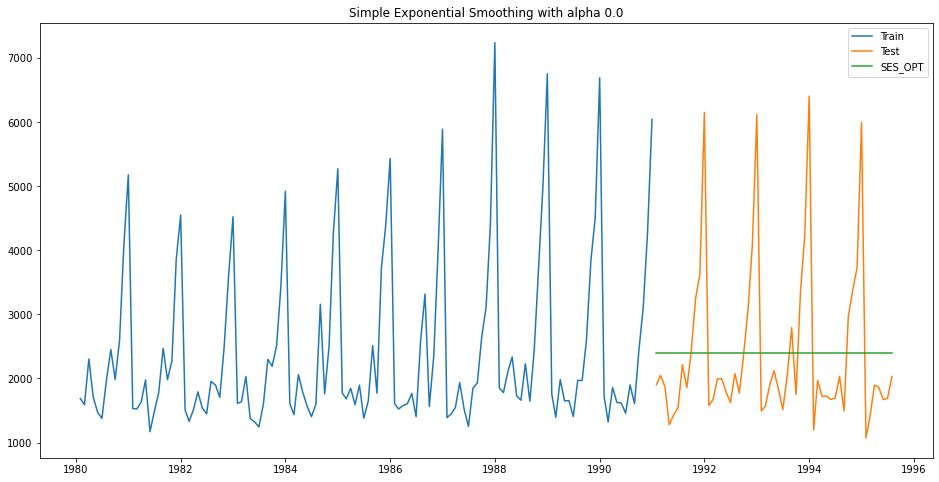

In [113]:
y_hat_avg['SES']     = model_fit.forecast(len(SES_test['Sparkling']))

alpha_value          = np.round(model_fit.params['smoothing_level'], 4)


plt.figure(figsize=(16,8))
plt.plot(SES_train.index, SES_train['Sparkling'], label = 'Train')
plt.plot(SES_test.index, SES_test['Sparkling'],   label = 'Test')
plt.plot(SES_test.index, y_hat_avg.SES,   label = 'SES_OPT')
plt.title('Simple Exponential Smoothing with alpha ' + str(alpha_value))
plt.legend(loc='best') 
plt.show()

In [114]:
SES_RMSE            =  np.sqrt(mean_squared_error(SES_test['Sparkling'], y_hat_avg.SES))
SES_MAPE             =  MAPE(SES_test['Sparkling'], y_hat_avg.SES)

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, SES_RMSE, SES_MAPE))

For alpha = 0.00,  RMSE is 1275.0818 MAPE is 38.90


In [115]:
resultsDf_6 = pd.DataFrame({'Method': 'SES', 'Test_RMSE': [SES_RMSE], 'Test_MAPE' : [SES_MAPE]})
resultsDf = pd.concat([resultsDf, resultsDf_6])

In [116]:
resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 7: Holt's Linear Trend Method (Double Exponential Smoothing)

In [117]:
import statsmodels.api as sm

In [118]:
y_hat_avg = SES_test.copy()

In [119]:
model_fit = Holt(np.asarray(SES_train['Sparkling'])).fit()

In [120]:
y_hat_avg['Holt_linear'] = model_fit.forecast(len(SES_test))

In [121]:
print('')
print('==Holt model Exponential Smoothing Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)

print('Smoothing Level', alpha_value )
print('Smoothing Slope', beta_value)
print('Initial Level',   np.round(model_fit.params['initial_level'], 4))
print('')


==Holt model Exponential Smoothing Parameters ==

Smoothing Level 0.6478
Smoothing Slope 0.0
Initial Level 1686.0838



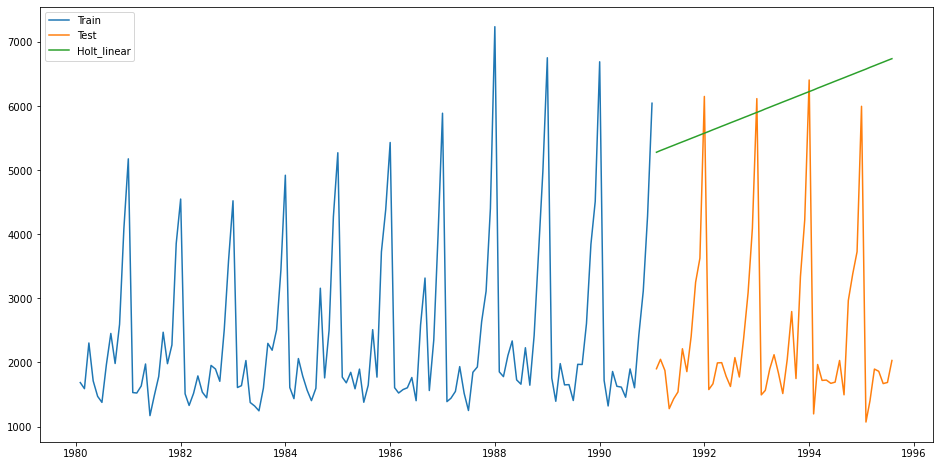

In [122]:
plt.figure(figsize=(16,8))
plt.plot(train['Sparkling'], label='Train')
plt.plot(test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_linear'], label='Holt_linear')
plt.legend(loc='best')
plt.show()

In [123]:
rmse_opt             =  np.sqrt(mean_squared_error(test['Sparkling'], y_hat_avg['Holt_linear']))
mape_opt             =  MAPE(test['Sparkling'], y_hat_avg['Holt_linear'])

print("For alpha = %1.2f,  RMSE is %3.4f MAPE is %3.2f" %(alpha_value, rmse_opt, mape_opt))

For alpha = 0.65,  RMSE is 3850.9410 MAPE is 152.06


In [124]:
resultsDf_7 = pd.DataFrame({'Method': 'Holt_linear', 'Test_RMSE': [rmse_opt], 'Test_MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, resultsDf_7])
resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900
0               Holt_linear  3850.940953    152.060

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Methd 8:Triple Exponential Smoothing Models

In [125]:
y_hat_avg = SES_test.copy()

In [126]:
model_fit = ExponentialSmoothing(np.asarray(SES_train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='add').fit()

In [127]:
y_hat_avg['Holt_Winter'] = model_fit.forecast(len(SES_test))

In [128]:
print('')
print('== Holt-Winters Additive ETS(A,A,A) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,A) Parameters ==

Smoothing Level:  0.0862
Smoothing Slope:  0.0
Smoothing Seasonal:  0.4764
Initial Level:  1684.8579
Initial Slope:  0.0067
Initial Seasons:  [  39.1834  -37.7856  464.669   206.1335 -141.0739 -157.2326  338.094
  856.8682  403.5904  971.2824 2401.592  3426.6345]



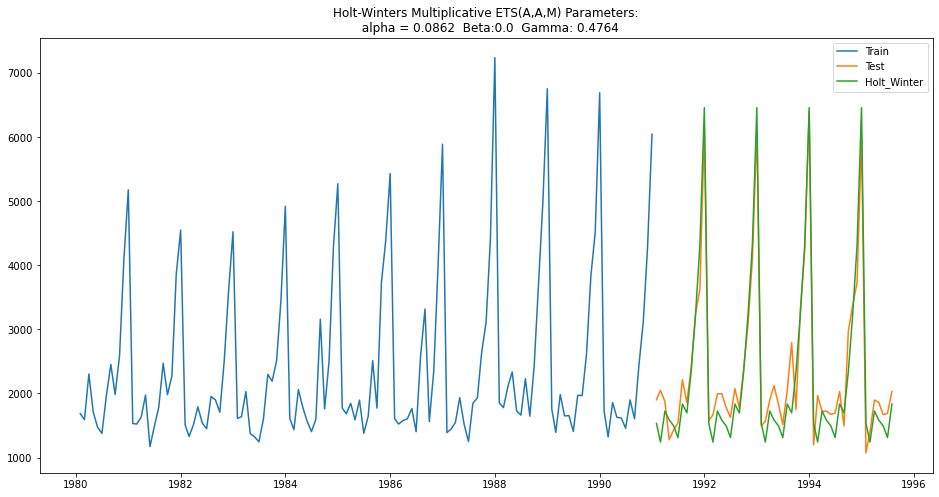

In [129]:
plt.figure(figsize=(16,8))
plt.plot( SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter'], label='Holt_Winter')
plt.title('Holt-Winters Addictive ETS(A,A,A) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [130]:
rmse_opt             =  np.sqrt(mean_squared_error(SES_test['Sparkling'], y_hat_avg['Holt_Winter']))
mape_opt             =  MAPE(SES_test['Sparkling'], y_hat_avg['Holt_Winter'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.09, beta = 0.00, gamma = 0.48, RMSE is 362.7286 MAPE is 12.08


In [131]:
resultsDf_8 = pd.DataFrame({'Method': 'Holt_Winter', 'Test_RMSE': [rmse_opt], 'Test_MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, resultsDf_8])
resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900
0               Holt_linear  3850.940953    152.060
0               Holt_Winter   362.728645     12.080

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 9: Holt-Winters Method - Multiplicative Model - Build this model and compare with the other models.

In [132]:
y_hat_avg = SES_test.copy()

In [133]:
model_fit = ExponentialSmoothing(np.asarray(SES_train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [134]:
y_hat_avg['Holt_Winter_M'] = model_fit.forecast(len(SES_test))

In [135]:
print('')
print('== Holt-Winters Additive ETS(A,A,M) Parameters ==')
print('')
alpha_value = np.round(model_fit.params['smoothing_level'], 4)
beta_value  = np.round(model_fit.params['smoothing_slope'], 4)
gamma_value = np.round(model_fit.params['smoothing_seasonal'], 4) 

print('Smoothing Level: ', alpha_value)
print('Smoothing Slope: ', beta_value)
print('Smoothing Seasonal: ', gamma_value)
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Holt-Winters Additive ETS(A,A,M) Parameters ==

Smoothing Level:  0.1542
Smoothing Slope:  0.0
Smoothing Seasonal:  0.3713
Initial Level:  1639.9993
Initial Slope:  4.848
Initial Seasons:  [1.0084 0.969  1.2418 1.1321 0.9398 0.9381 1.2246 1.5443 1.2734 1.632
 2.4829 3.1186]



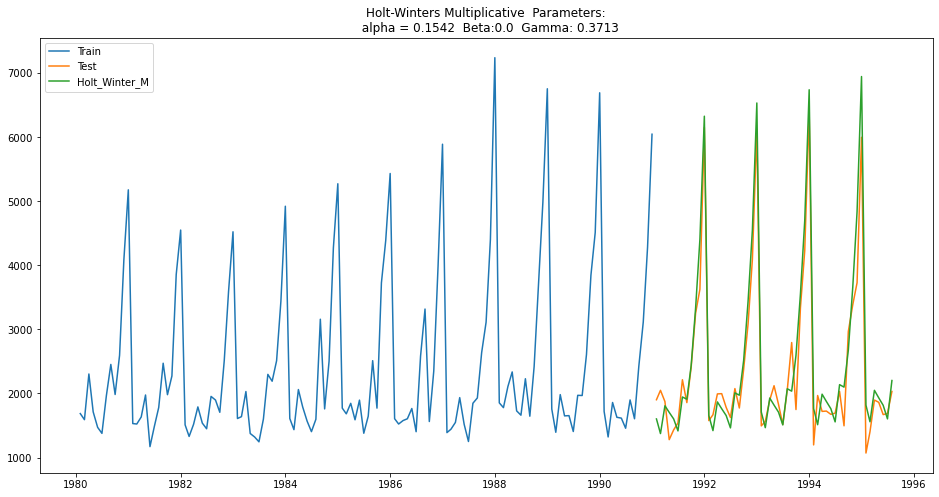

In [136]:
plt.figure(figsize=(16,8))
plt.plot( SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Holt_Winter_M'], label='Holt_Winter_M')
plt.title('Holt-Winters Multiplicative  Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [137]:
rmse_opt             =  np.sqrt(mean_squared_error(SES_test['Sparkling'], y_hat_avg['Holt_Winter_M']))
mape_opt             =  MAPE(SES_test['Sparkling'], y_hat_avg['Holt_Winter_M'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.15, beta = 0.00, gamma = 0.37, RMSE is 383.1657 MAPE is 11.91


In [138]:
resultsDf_9 = pd.DataFrame({'Method': 'Holt_Winter M', 'Test_RMSE': [rmse_opt], 'Test_MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, resultsDf_9])
resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900
0               Holt_linear  3850.940953    152.060
0               Holt_Winter   362.728645     12.080
0             Holt_Winter M   383.165741     11.910

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Method 10: Brown SES

In [139]:
y_hat_avg = SES_test.copy()

In [140]:
import statsmodels.tsa.holtwinters     as      ets

In [141]:
model_fit = ExponentialSmoothing(np.asarray(SES_train['Sparkling']) ,seasonal_periods = 12 ,trend='add', seasonal='Multiplicative').fit()

In [142]:
y_hat_avg['Brown SES'] = model_fit.forecast(len(SES_test))

In [143]:

print('')
print('== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==')
print('')
print('Initial Level: ', np.round(model_fit.params['initial_level'], 4))
print('Initial Slope: ', np.round(model_fit.params['initial_slope'], 4))
print('Initial Seasons: ', np.round(model_fit.params['initial_seasons'], 4))
print('')


== Brown Simple Exponential Smoothing ETS (A, N, N) Parameters ==

Initial Level:  1639.9993
Initial Slope:  4.848
Initial Seasons:  [1.0084 0.969  1.2418 1.1321 0.9398 0.9381 1.2246 1.5443 1.2734 1.632
 2.4829 3.1186]



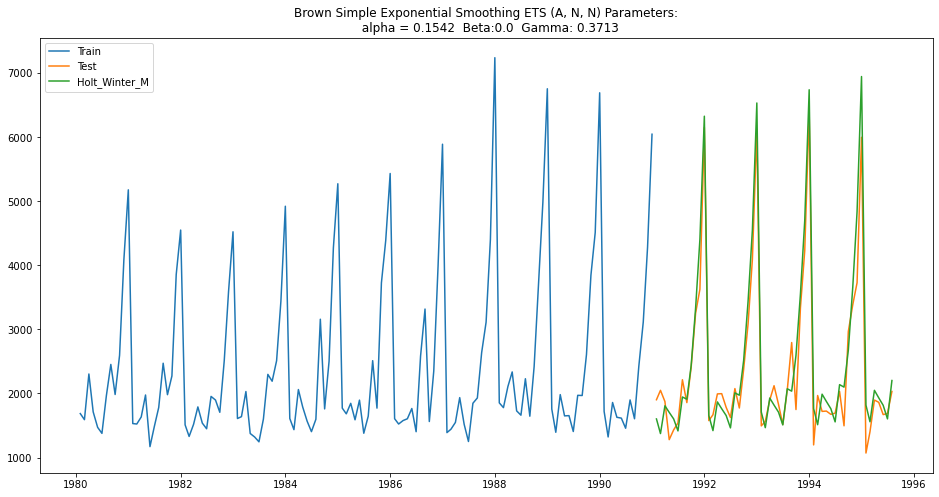

In [144]:
plt.figure(figsize=(16,8))
plt.plot( SES_train['Sparkling'], label='Train')
plt.plot(SES_test['Sparkling'], label='Test')
plt.plot(y_hat_avg['Brown SES'], label='Holt_Winter_M')
plt.title('Brown Simple Exponential Smoothing ETS (A, N, N) Parameters:\n  alpha = ' + 
          str(alpha_value) + '  Beta:' + 
          str(beta_value) +
          '  Gamma: ' + str(gamma_value))
plt.legend(loc='best')

In [145]:
rmse_opt             =  np.sqrt(mean_squared_error(SES_test['Sparkling'], y_hat_avg['Brown SES']))
mape_opt             =  MAPE(SES_test['Sparkling'], y_hat_avg['Brown SES'])

print("For alpha = %1.2f, beta = %1.2f, gamma = %1.2f, RMSE is %3.4f MAPE is %3.2f" %(alpha_value, beta_value, gamma_value, rmse_opt, mape_opt))

For alpha = 0.15, beta = 0.00, gamma = 0.37, RMSE is 383.1657 MAPE is 11.91


In [146]:
resultsDf_10 = pd.DataFrame({'Method': 'Brown SES', 'Test_RMSE': [rmse_opt], 'Test_MAPE' : [mape_opt]})
resultsDf = pd.concat([resultsDf, resultsDf_10])
resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900
0               Holt_linear  3850.940953    152.060
0               Holt_Winter   362.728645     12.080
0             Holt_Winter M   383.165741     11.910
0                 Brown SES   383.165741     11.910

In [147]:
from sklearn import metrics

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Build an Automated version of an ARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

In [148]:
import itertools
p = q = range(0, 3)
d= range(1,2)
pdq = list(itertools.product(p, d, q))
print('Some parameter combinations for the Model...')
for i in range(1,len(pdq)):
    print('Model: {}'.format(pdq[i]))

Some parameter combinations for the Model...
Model: (0, 1, 1)
Model: (0, 1, 2)
Model: (1, 1, 0)
Model: (1, 1, 1)
Model: (1, 1, 2)
Model: (2, 1, 0)
Model: (2, 1, 1)
Model: (2, 1, 2)


In [149]:
ARIMA_AIC = pd.DataFrame(columns=['param', 'AIC'])
ARIMA_AIC

Empty DataFrame
Columns: [param, AIC]
Index: []

In [150]:
print(SES_train.shape)
print(SES_test.shape)

(132, 3)
(55, 2)


In [151]:
from statsmodels.tsa.arima_model import ARIMA

for param in pdq:
    ARIMA_model = ARIMA(SES_train['Sparkling'].values,order=param).fit()
    print('ARIMA{} - AIC:{}'.format(param,ARIMA_model.aic))
    ARIMA_AIC = ARIMA_AIC.append({'param':param, 'AIC': ARIMA_model.aic}, ignore_index=True)

ARIMA(0, 1, 0) - AIC:2269.582796371201
ARIMA(0, 1, 1) - AIC:2264.9064375690555
ARIMA(0, 1, 2) - AIC:2232.783097684015
ARIMA(1, 1, 0) - AIC:2268.528060571409
ARIMA(1, 1, 1) - AIC:2235.01394534965
ARIMA(1, 1, 2) - AIC:2233.59764711896
ARIMA(2, 1, 0) - AIC:2262.035600127695
ARIMA(2, 1, 1) - AIC:2232.36048987826
ARIMA(2, 1, 2) - AIC:2210.616811567095


In [152]:
ARIMA_AIC.sort_values(by='AIC',ascending=True)

param          AIC
8  (2, 1, 2)  2210.616812
7  (2, 1, 1)  2232.360490
2  (0, 1, 2)  2232.783098
5  (1, 1, 2)  2233.597647
4  (1, 1, 1)  2235.013945
6  (2, 1, 0)  2262.035600
1  (0, 1, 1)  2264.906438
3  (1, 1, 0)  2268.528061
0  (0, 1, 0)  2269.582796

In [153]:
auto_ARIMA = ARIMA(SES_train['Sparkling'], order=(2,1,2),freq='M')

results_auto_ARIMA = auto_ARIMA.fit()

print(results_auto_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1099.308
Method:                       css-mle   S.D. of innovations           1011.982
Date:                Sat, 12 Sep 2020   AIC                           2210.617
Time:                        17:17:15   BIC                           2227.868
Sample:                    02-29-1980   HQIC                          2217.627
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 5.5859      0.516     10.821      0.000       4.574       6.598
ar.L1.D.Sparkling     1.2699      0.074     17.047      0.000       1.124       1.416
ar.L2.D.Sparkling    -0.

<font color='purple'/><span style="font-family:Garamond; font-size:1.3em;"><U/><B/>Predict on the Test Set using this model and evaluate the model.

In [154]:
predicted_auto_ARIMA = results_auto_ARIMA.forecast(steps=len(SES_test))

In [155]:
from sklearn.metrics import  mean_squared_error
rmse = mean_squared_error(SES_test['Sparkling'],predicted_auto_ARIMA[0],squared=False)
print(rmse)

1375.0362989846199


In [156]:
resultsDf_12 = pd.DataFrame({'Method': 'ARIMA (2,1,2)','Test_RMSE': [rmse]})
                           
resultsDf=pd.concat([resultsDf, resultsDf_12])
resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900
0               Holt_linear  3850.940953    152.060
0               Holt_Winter   362.728645     12.080
0             Holt_Winter M   383.165741     11.910
0                 Brown SES   383.165741     11.910
0             ARIMA (2,1,2)  1375.036299        NaN

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Build a version of the ARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots

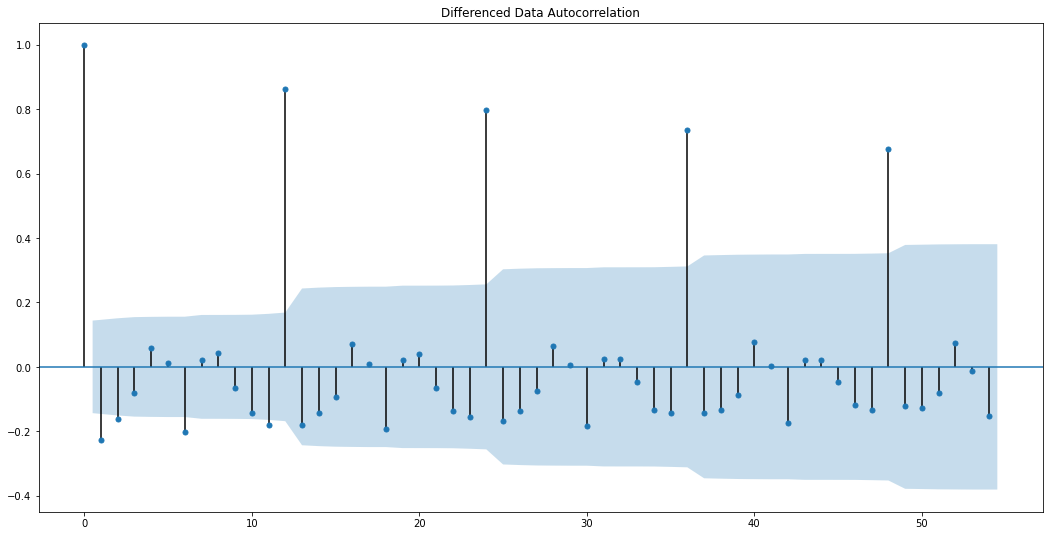

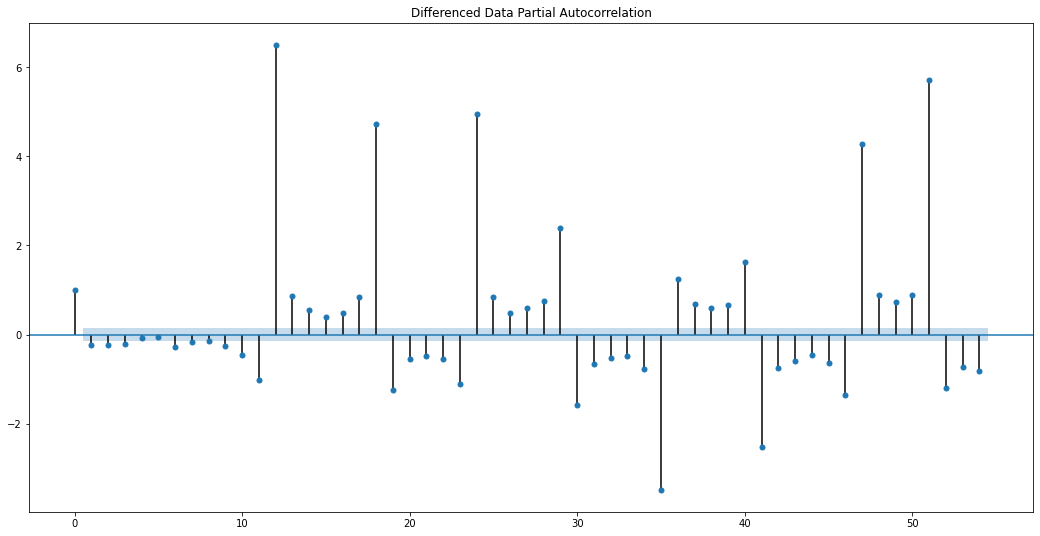

In [158]:
plot_acf(df['Sparkling'].diff().dropna(),lags=54,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=54,title='Differenced Data Partial Autocorrelation')
plt.show()

In [159]:
manual_ARIMA = ARIMA(SES_train['Sparkling'], order=(1,1,1),freq='M')

results_manual_ARIMA = manual_ARIMA.fit()

print(results_manual_ARIMA.summary())

                             ARIMA Model Results                              
Dep. Variable:            D.Sparkling   No. Observations:                  131
Model:                 ARIMA(1, 1, 1)   Log Likelihood               -1113.507
Method:                       css-mle   S.D. of innovations           1171.377
Date:                Sat, 12 Sep 2020   AIC                           2235.014
Time:                        17:19:41   BIC                           2246.515
Sample:                    02-29-1980   HQIC                          2239.687
                         - 12-31-1990                                         
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 6.7490      4.616      1.462      0.144      -2.299      15.797
ar.L1.D.Sparkling     0.4289      0.082      5.221      0.000       0.268       0.590
ma.L1.D.Sparkling    -1.

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Predict on the Test Set using this model and evaluate the model

In [160]:
predicted_manual_ARIMA = results_manual_ARIMA.forecast(steps=len(SES_test))

In [161]:
rmse = mean_squared_error(SES_test['Sparkling'],predicted_manual_ARIMA[0],squared=False)
print(rmse)

1461.6664003074409


In [162]:
resultsDf_13 = pd.DataFrame({'Method': 'ARIMA (1,1,1)','Test_RMSE': [rmse]})
                      
resultsDf=pd.concat([resultsDf, resultsDf_13])
resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900
0               Holt_linear  3850.940953    152.060
0               Holt_Winter   362.728645     12.080
0             Holt_Winter M   383.165741     11.910
0                 Brown SES   383.165741     11.910
0             ARIMA (2,1,2)  1375.036299        NaN
0             ARIMA (1,1,1)  1461.666400        NaN

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Build an Automated version of a SARIMA model for which the best parameters are selected in accordance with the lowest Akaike Information Criteria (AIC).

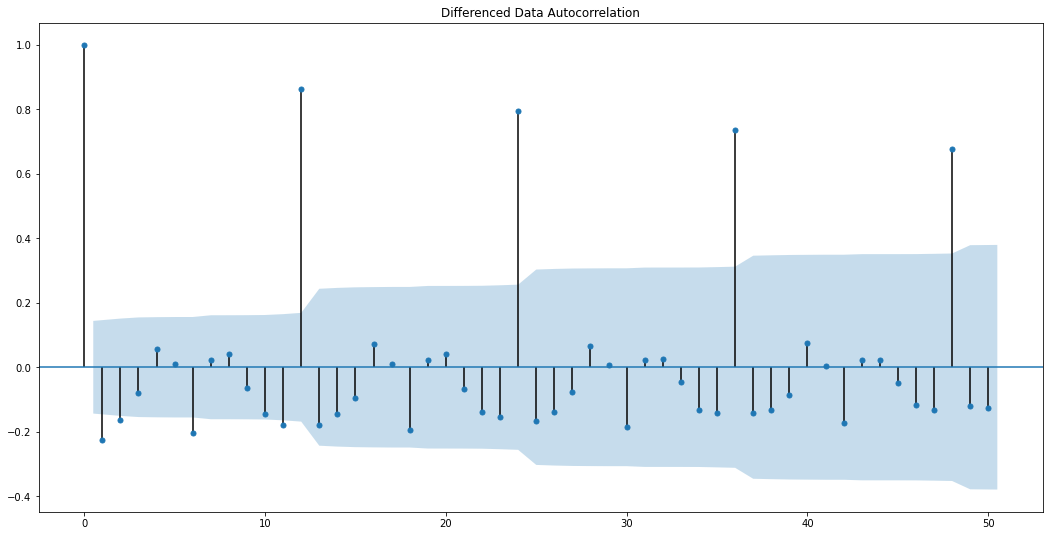

In [163]:
plot_acf(df['Sparkling'].diff().dropna(),lags=50,title='Differenced Data Autocorrelation')
plt.show()

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Setting the seasonality as 6 for the first iteration of the auto SARIMA model

In [164]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 6) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 6)
Model: (0, 1, 2)(0, 0, 2, 6)
Model: (1, 1, 0)(1, 0, 0, 6)
Model: (1, 1, 1)(1, 0, 1, 6)
Model: (1, 1, 2)(1, 0, 2, 6)
Model: (2, 1, 0)(2, 0, 0, 6)
Model: (2, 1, 1)(2, 0, 1, 6)
Model: (2, 1, 2)(2, 0, 2, 6)


In [165]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [166]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(SES_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 6)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 6)7 - AIC:2152.378076093465
SARIMA(0, 1, 0)x(0, 0, 2, 6)7 - AIC:1955.63555369121
SARIMA(0, 1, 0)x(1, 0, 0, 6)7 - AIC:2164.4097581959904
SARIMA(0, 1, 0)x(1, 0, 1, 6)7 - AIC:2079.55998802639
SARIMA(0, 1, 0)x(1, 0, 2, 6)7 - AIC:1926.9360111417755
SARIMA(0, 1, 0)x(2, 0, 0, 6)7 - AIC:1839.401298687227
SARIMA(0, 1, 0)x(2, 0, 1, 6)7 - AIC:1841.1993618160636
SARIMA(0, 1, 0)x(2, 0, 2, 6)7 - AIC:1810.917781143946
SARIMA(0, 1, 1)x(0, 0, 0, 6)7 - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 6)7 - AIC:2130.5652859089746
SARIMA(0, 1, 1)x(0, 0, 2, 6)7 - AIC:1918.1741583229602
SARIMA(0, 1, 1)x(1, 0, 0, 6)7 - AIC:2139.5733191809354
SARIMA(0, 1, 1)x(1, 0, 1, 6)7 - AIC:2006.5174298481284
SARIMA(0, 1, 1)x(1, 0, 2, 6)7 - AIC:1855.707554571194
SARIMA(0, 1, 1)x(2, 0, 0, 6)7 - AIC:1798.7885103929789
SARIMA(0, 1, 1)x(2, 0, 1, 6)7 - AIC:1800.7726226256218
SARIMA(0, 1, 1)x(2, 0, 2, 6)7 - AIC:1741.6414772057071
SARIMA(0, 1, 2)x(0

In [167]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param      seasonal          AIC
53  (1, 1, 2)  (2, 0, 2, 6)  1727.678698
26  (0, 1, 2)  (2, 0, 2, 6)  1727.887988
17  (0, 1, 1)  (2, 0, 2, 6)  1741.641477
71  (2, 1, 1)  (2, 0, 2, 6)  1744.040754
78  (2, 1, 2)  (2, 0, 0, 6)  1758.961073

In [168]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(SES_train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -855.839
Date:                           Sat, 12 Sep 2020   AIC                           1727.679
Time:                                   17:27:37   BIC                           1749.707
Sample:                                        0   HQIC                          1736.621
                                           - 132                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6449      0.286     -2.256      0.024      -1.205      -0.085
ma.L1         -0.1068      0.250     -0.428

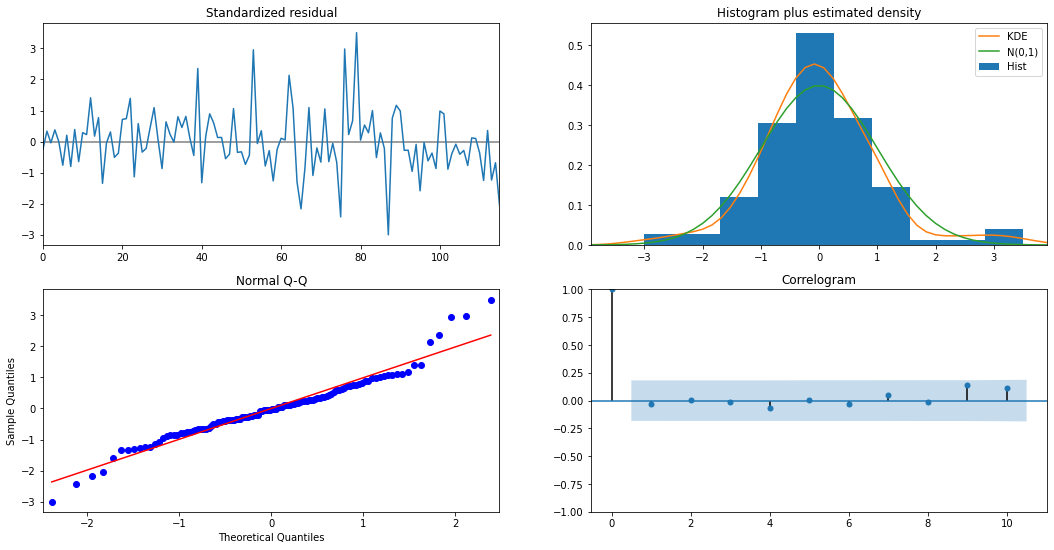

In [169]:
results_auto_SARIMA_6.plot_diagnostics()
plt.show()

In [209]:
import statsmodels.api as sm

auto_SARIMA_6 = sm.tsa.statespace.SARIMAX(SES_test['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(2, 0, 2, 6),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_6 = auto_SARIMA_6.fit(maxiter=1000)
print(results_auto_SARIMA_6.summary())

                                     SARIMAX Results                                     
Dep. Variable:                                 y   No. Observations:                   54
Model:             SARIMAX(1, 1, 2)x(2, 0, 2, 6)   Log Likelihood                -277.135
Date:                           Sat, 12 Sep 2020   AIC                            570.269
Time:                                   02:17:55   BIC                            583.370
Sample:                                        0   HQIC                           574.931
                                            - 54                                         
Covariance Type:                             opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.2368      0.578     -0.410      0.682      -1.370       0.896
ma.L1        671.3862   2.98e+05      0.002

In [170]:
predicted_auto_SARIMA_6 = results_auto_SARIMA_6.get_forecast(steps=len(SES_test))

In [171]:
predicted_auto_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1330.296310  380.582522     584.368275    2076.224346
1  1177.302021  392.138976     408.723751    1945.880292
2  1625.817133  392.333467     856.857668    2394.776598
3  1546.267429  397.736054     766.719088    2325.815770
4  1308.798833  398.956387     526.858683    2090.738983

In [172]:
rmse = mean_squared_error(SES_test['Sparkling'],predicted_auto_SARIMA_6.predicted_mean,squared=False)
print(rmse)

626.929531496259


In [173]:
resultsDf_14 = pd.DataFrame({'Method': 'SARIMA(1,1,2)(2,0,2,6)','Test_RMSE': [rmse]})
                        

resultsDf = pd.concat([resultsDf,resultsDf_14])

resultsDf

Method    Test_RMSE  Test_MAPE
0          RegressionOnTime  1389.135000     50.150
0  RegressionOnTimeSeasonal  1389.135000     50.150
0               Naive model  3864.279000    152.870
0            Simple Average  1275.082000     38.900
0     moving_avg_forecast_4  1156.590000   1156.590
0     moving_avg_forecast_6  1283.927000   1283.927
0     moving_avg_forecast_8  1342.568000   1342.568
0    moving_avg_forecast_12  1267.925000   1267.925
0                       SES  1275.081766     38.900
0               Holt_linear  3850.940953    152.060
0               Holt_Winter   362.728645     12.080
0             Holt_Winter M   383.165741     11.910
0                 Brown SES   383.165741     11.910
0             ARIMA (2,1,2)  1375.036299        NaN
0             ARIMA (1,1,1)  1461.666400        NaN
0    SARIMA(1,1,2)(2,0,2,6)   626.929531        NaN

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Setting the seasonality as 12 for the first iteration of the auto SARIMA model

In [174]:
import itertools
p = q = range(0, 3)
d= range(1,2)
D = range(0,1)
pdq = list(itertools.product(p, d, q))
model_pdq = [(x[0], x[1], x[2], 12) for x in list(itertools.product(p, D, q))]
print('Examples of some parameter combinations for Model...')
for i in range(1,len(pdq)):
    print('Model: {}{}'.format(pdq[i], model_pdq[i]))

Examples of some parameter combinations for Model...
Model: (0, 1, 1)(0, 0, 1, 12)
Model: (0, 1, 2)(0, 0, 2, 12)
Model: (1, 1, 0)(1, 0, 0, 12)
Model: (1, 1, 1)(1, 0, 1, 12)
Model: (1, 1, 2)(1, 0, 2, 12)
Model: (2, 1, 0)(2, 0, 0, 12)
Model: (2, 1, 1)(2, 0, 1, 12)
Model: (2, 1, 2)(2, 0, 2, 12)


In [175]:
SARIMA_AIC = pd.DataFrame(columns=['param','seasonal', 'AIC'])
SARIMA_AIC

Empty DataFrame
Columns: [param, seasonal, AIC]
Index: []

In [176]:
import statsmodels.api as sm

for param in pdq:
    for param_seasonal in model_pdq:
        SARIMA_model = sm.tsa.statespace.SARIMAX(SES_train['Sparkling'].values,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False)
            
        results_SARIMA = SARIMA_model.fit(maxiter=1000)
        print('SARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results_SARIMA.aic))
        SARIMA_AIC = SARIMA_AIC.append({'param':param,'seasonal':param_seasonal ,'AIC': results_SARIMA.aic}, ignore_index=True)

SARIMA(0, 1, 0)x(0, 0, 0, 12)7 - AIC:2251.3597196862966
SARIMA(0, 1, 0)x(0, 0, 1, 12)7 - AIC:1956.2614616844767
SARIMA(0, 1, 0)x(0, 0, 2, 12)7 - AIC:1723.1533640235596
SARIMA(0, 1, 0)x(1, 0, 0, 12)7 - AIC:1837.436602245668
SARIMA(0, 1, 0)x(1, 0, 1, 12)7 - AIC:1806.990530137276
SARIMA(0, 1, 0)x(1, 0, 2, 12)7 - AIC:1633.2108735940208
SARIMA(0, 1, 0)x(2, 0, 0, 12)7 - AIC:1648.3776153470858
SARIMA(0, 1, 0)x(2, 0, 1, 12)7 - AIC:1647.2054160641294
SARIMA(0, 1, 0)x(2, 0, 2, 12)7 - AIC:1630.989805450996
SARIMA(0, 1, 1)x(0, 0, 0, 12)7 - AIC:2230.1629078505994
SARIMA(0, 1, 1)x(0, 0, 1, 12)7 - AIC:1923.7688649611882
SARIMA(0, 1, 1)x(0, 0, 2, 12)7 - AIC:1692.708957298029
SARIMA(0, 1, 1)x(1, 0, 0, 12)7 - AIC:1797.1795881792473
SARIMA(0, 1, 1)x(1, 0, 1, 12)7 - AIC:1738.0973022374103
SARIMA(0, 1, 1)x(1, 0, 2, 12)7 - AIC:1570.131965884965
SARIMA(0, 1, 1)x(2, 0, 0, 12)7 - AIC:1605.675195449527
SARIMA(0, 1, 1)x(2, 0, 1, 12)7 - AIC:1599.2245086683886
SARIMA(0, 1, 1)x(2, 0, 2, 12)7 - AIC:1570.368374044508

In [215]:
SARIMA_AIC.sort_values(by=['AIC']).head()

param       seasonal          AIC
50  (1, 1, 2)  (1, 0, 2, 12)  1555.584247
53  (1, 1, 2)  (2, 0, 2, 12)  1556.080255
26  (0, 1, 2)  (2, 0, 2, 12)  1557.121563
23  (0, 1, 2)  (1, 0, 2, 12)  1557.160319
80  (2, 1, 2)  (2, 0, 2, 12)  1557.689326

In [177]:
import statsmodels.api as sm

auto_SARIMA_12 = sm.tsa.statespace.SARIMAX(train['Sparkling'].values,
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_auto_SARIMA_12 = auto_SARIMA_12.fit(maxiter=1000)
print(results_auto_SARIMA_12.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood                -770.792
Date:                            Sat, 12 Sep 2020   AIC                           1555.584
Time:                                    18:01:16   BIC                           1574.095
Sample:                                         0   HQIC                          1563.083
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6282      0.255     -2.463      0.014      -1.128      -0.128
ma.L1         -0.1041      0.225   

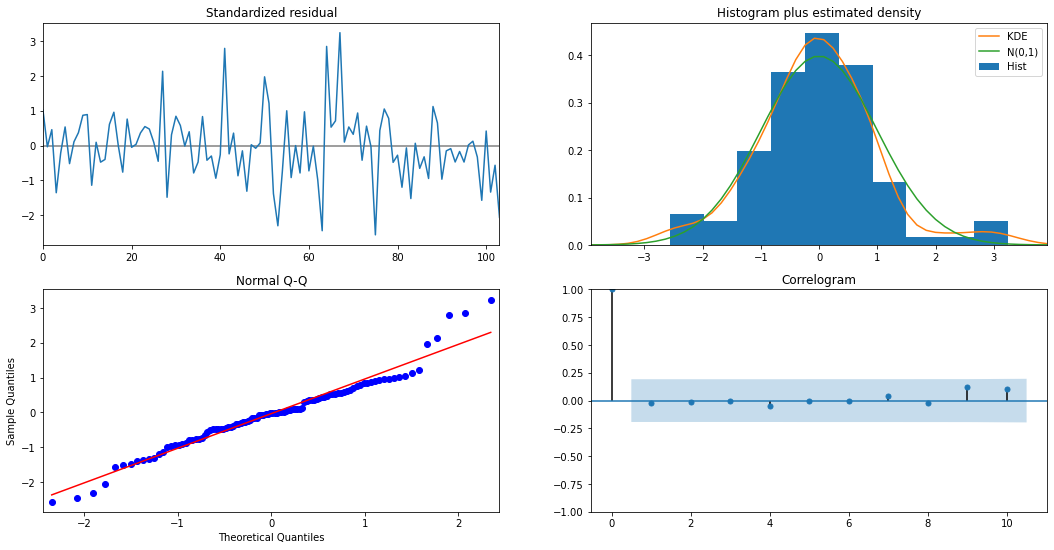

In [178]:
results_auto_SARIMA_12.plot_diagnostics()
plt.show()

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Predict on the Test Set using this model and evaluate the model

In [179]:
predicted_auto_SARIMA_12 = results_auto_SARIMA_12.get_forecast(steps=len(SES_test))

In [180]:
predicted_auto_SARIMA_12.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1327.446285  388.344108     566.305819    2088.586751
1  1315.148841  402.003487     527.236485    2103.061197
2  1621.632384  401.997099     833.732547    2409.532220
3  1598.908831  407.233378     800.746077    2397.071585
4  1392.738047  407.962881     593.145493    2192.330601

In [181]:
rmse = mean_squared_error(SES_test['Sparkling'],predicted_auto_SARIMA_12.predicted_mean,squared=False)
print(rmse)

528.5794984812624


In [182]:
resultsDf_15 = pd.DataFrame({'Method': 'SARIMA(1, 1, 2)x(1, 0, 2, 12)','Test_RMSE': [rmse]})
                           
resultsDf = pd.concat([resultsDf,resultsDf_15])

resultsDf

Method    Test_RMSE  Test_MAPE
0               RegressionOnTime  1389.135000     50.150
0       RegressionOnTimeSeasonal  1389.135000     50.150
0                    Naive model  3864.279000    152.870
0                 Simple Average  1275.082000     38.900
0          moving_avg_forecast_4  1156.590000   1156.590
0          moving_avg_forecast_6  1283.927000   1283.927
0          moving_avg_forecast_8  1342.568000   1342.568
0         moving_avg_forecast_12  1267.925000   1267.925
0                            SES  1275.081766     38.900
0                    Holt_linear  3850.940953    152.060
0                    Holt_Winter   362.728645     12.080
0                  Holt_Winter M   383.165741     11.910
0                      Brown SES   383.165741     11.910
0                  ARIMA (2,1,2)  1375.036299        NaN
0                  ARIMA (1,1,1)  1461.666400        NaN
0         SARIMA(1,1,2)(2,0,2,6)   626.929531        NaN
0  SARIMA(1, 1, 2)x(1, 0, 2, 12)   528.579498        NaN

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Build a version of the SARIMA model for which the best parameters are selected by looking at the ACF and the PACF plots.

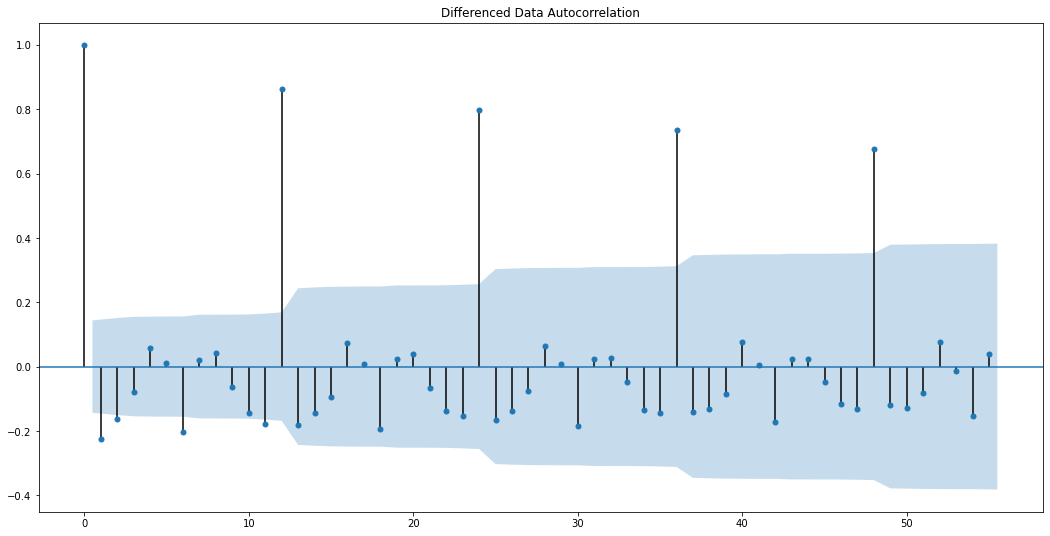

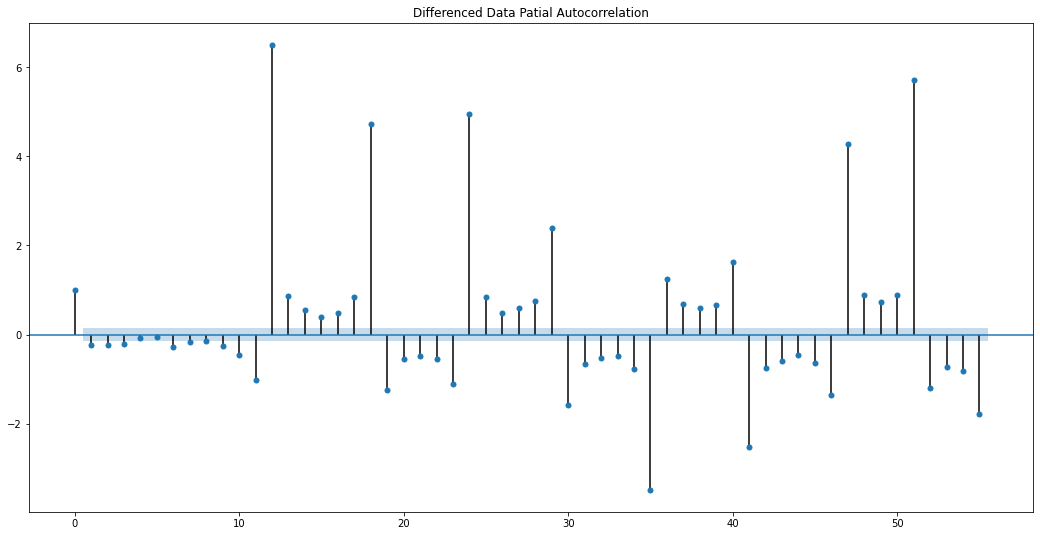

In [187]:
plot_acf(df['Sparkling'].diff().dropna(),lags=55,title='Differenced Data Autocorrelation')
plot_pacf(df['Sparkling'].diff().dropna(),lags=55,title='Differenced Data Patial Autocorrelation')
plt.show()

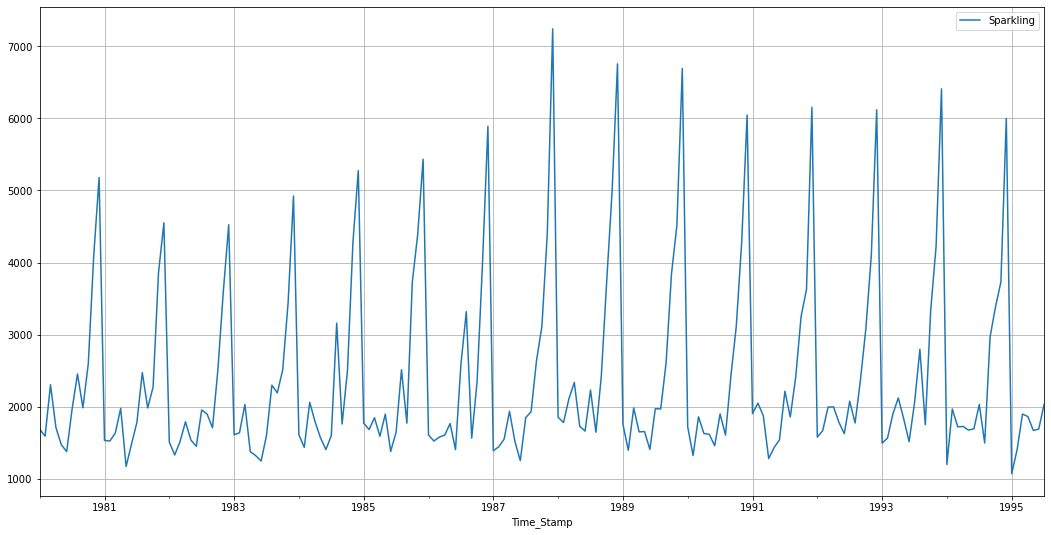

In [188]:
df.plot()
plt.grid();

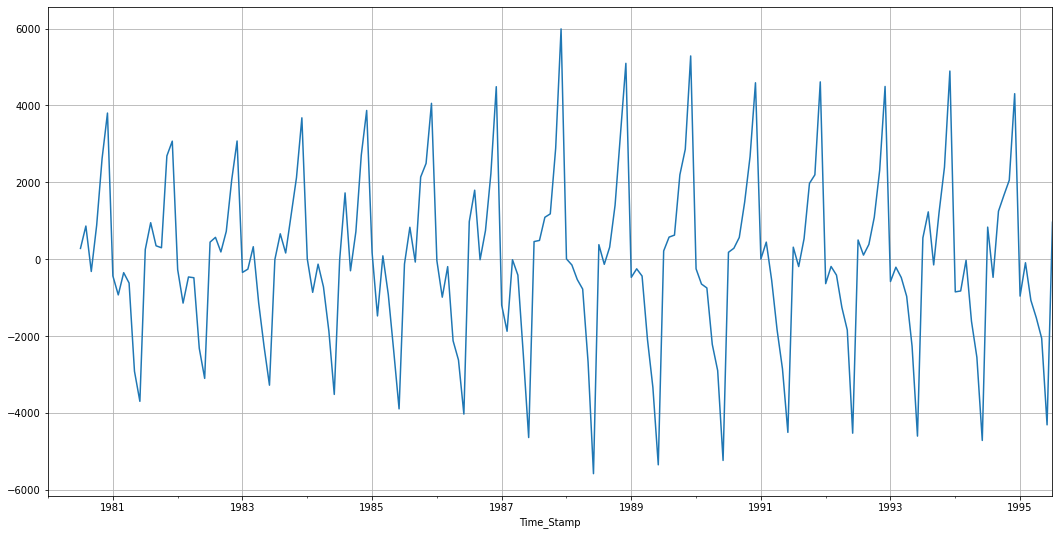

In [185]:
(df['Sparkling'].diff(6)).plot()
plt.grid();

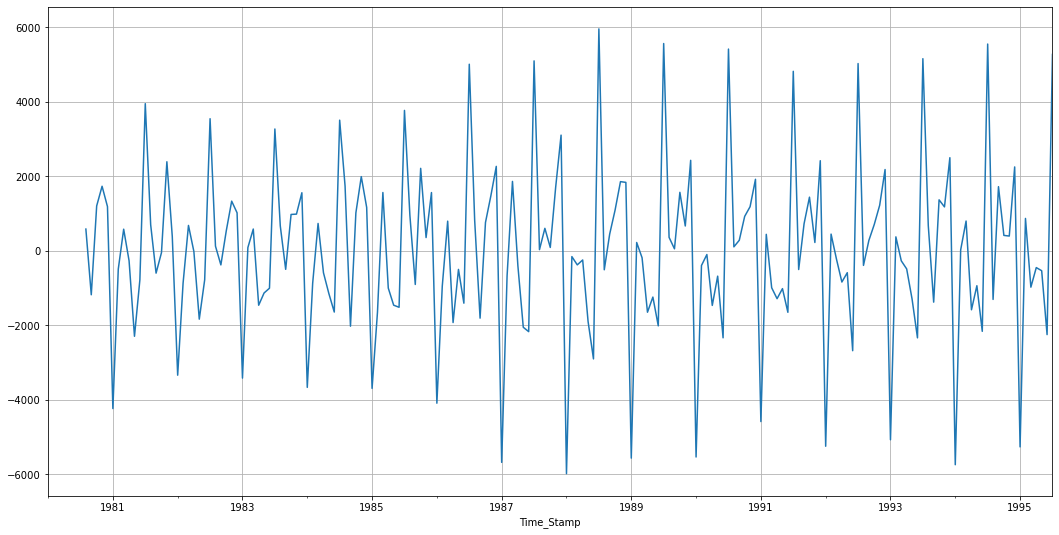

In [189]:
(df['Sparkling'].diff(6)).diff().plot()
plt.grid();

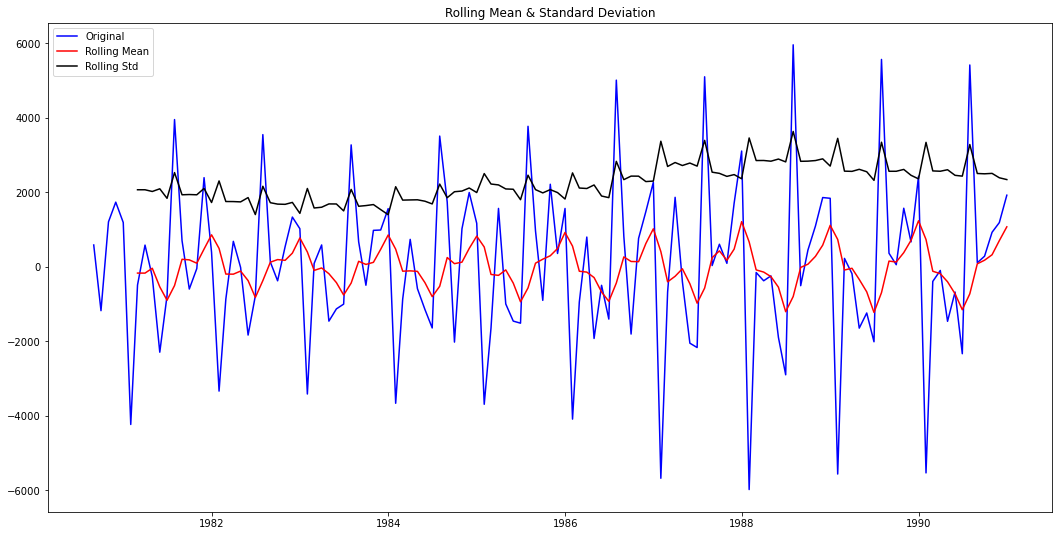

Results of Dickey-Fuller Test:
Test Statistic                -7.017242e+00
p-value                        6.683657e-10
#Lags Used                     1.300000e+01
Number of Observations Used    1.110000e+02
Critical Value (1%)           -3.490683e+00
Critical Value (5%)           -2.887952e+00
Critical Value (10%)          -2.580857e+00
dtype: float64 



In [190]:
test_stationarity((SES_train['Sparkling'].diff(6).dropna()).diff(1).dropna())

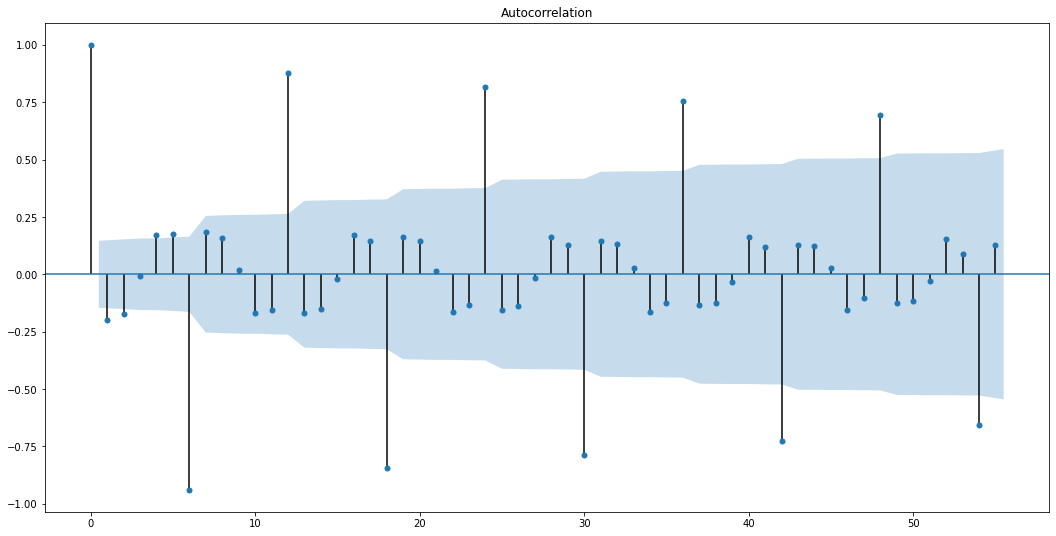

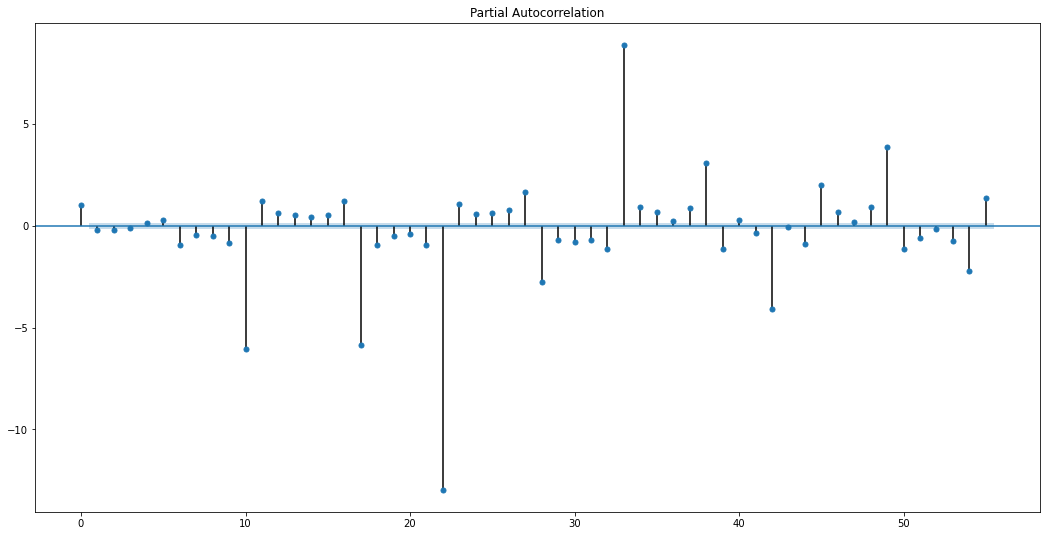

In [191]:
plot_acf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=55)
plot_pacf((df['Sparkling'].diff(6).dropna()).diff(1).dropna(),lags=55);

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Build SARIMAX Model

In [192]:
import statsmodels.api as sm

manual_SARIMA_6 = sm.tsa.statespace.SARIMAX(SES_train['Sparkling'].values,
                                order=(1, 1, 1),
                                seasonal_order=(1, 0, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_manual_SARIMA_6 = manual_SARIMA_6.fit(maxiter=1000)
print(results_manual_SARIMA_6.summary())

                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                  132
Model:             SARIMAX(1, 1, 1)x(1, 0, 1, 12)   Log Likelihood                -864.772
Date:                            Sat, 12 Sep 2020   AIC                           1739.545
Time:                                    18:04:24   BIC                           1753.356
Sample:                                         0   HQIC                          1745.152
                                            - 132                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0681      0.116      0.589      0.556      -0.158       0.294
ma.L1         -0.8858      0.064   

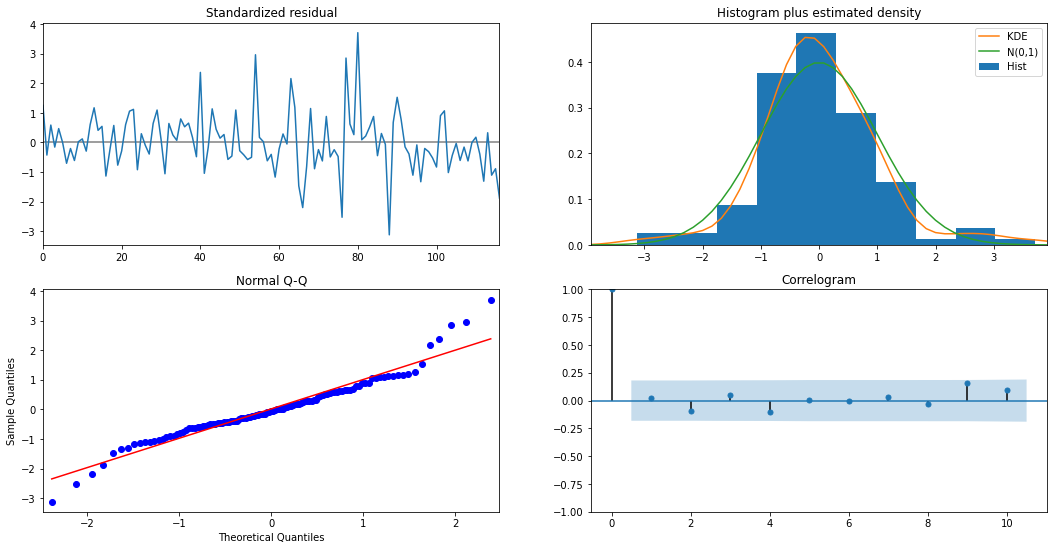

In [193]:
results_manual_SARIMA_6.plot_diagnostics()
plt.show()

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Predict on the Test Set using this model and evaluate the model

In [194]:
predicted_manual_SARIMA_6 = results_manual_SARIMA_6.get_forecast(steps=len(SES_test))

In [195]:
predicted_manual_SARIMA_6.summary_frame(alpha=0.05).head()

y         mean     mean_se  mean_ci_lower  mean_ci_upper
0  1400.607860  385.859775     644.336598    2156.879122
1  1162.530342  392.213266     393.806467    1931.254218
2  1640.413330  395.242864     865.751550    2415.075109
3  1513.341406  398.072621     733.133405    2293.549407
4  1372.808766  400.870644     587.116741    2158.500792

In [196]:
rmse = mean_squared_error(SES_test['Sparkling'],predicted_manual_SARIMA_6.predicted_mean,squared=False)
print(rmse)

582.0257301244442


In [197]:
resultsDf_16 = pd.DataFrame({'Method': 'SARIMAX(1, 1, 1)x(1, 0, 1, 12)','Test_RMSE': [rmse]})
                          
resultsDf = pd.concat([resultsDf,resultsDf_16])

resultsDf

Method    Test_RMSE  Test_MAPE
0                RegressionOnTime  1389.135000     50.150
0        RegressionOnTimeSeasonal  1389.135000     50.150
0                     Naive model  3864.279000    152.870
0                  Simple Average  1275.082000     38.900
0           moving_avg_forecast_4  1156.590000   1156.590
0           moving_avg_forecast_6  1283.927000   1283.927
0           moving_avg_forecast_8  1342.568000   1342.568
0          moving_avg_forecast_12  1267.925000   1267.925
0                             SES  1275.081766     38.900
0                     Holt_linear  3850.940953    152.060
0                     Holt_Winter   362.728645     12.080
0                   Holt_Winter M   383.165741     11.910
0                       Brown SES   383.165741     11.910
0                   ARIMA (2,1,2)  1375.036299        NaN
0                   ARIMA (1,1,1)  1461.666400        NaN
0          SARIMA(1,1,2)(2,0,2,6)   626.929531        NaN
0   SARIMA(1, 1, 2)x(1, 0, 2, 12)   528.579498        NaN
0  SARIMAX(1, 1, 1)x(1, 0, 1, 12)   582.025730        NaN

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Building the most optimum model on the Full Data

In [207]:
full_data_model = sm.tsa.statespace.SARIMAX(df['Sparkling'],
                                order=(1, 1, 2),
                                seasonal_order=(1, 0, 2, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False)
results_full_data_model = full_data_model.fit(maxiter=1000)
print(results_full_data_model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                          Sparkling   No. Observations:                  187
Model:             SARIMAX(1, 1, 2)x(1, 0, 2, 12)   Log Likelihood               -1173.433
Date:                            Sat, 12 Sep 2020   AIC                           2360.867
Time:                                    21:02:29   BIC                           2382.349
Sample:                                01-31-1980   HQIC                          2369.590
                                     - 07-31-1995                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.6609      0.243     -2.721      0.007      -1.137      -0.185
ma.L1         -0.2740      0.201   

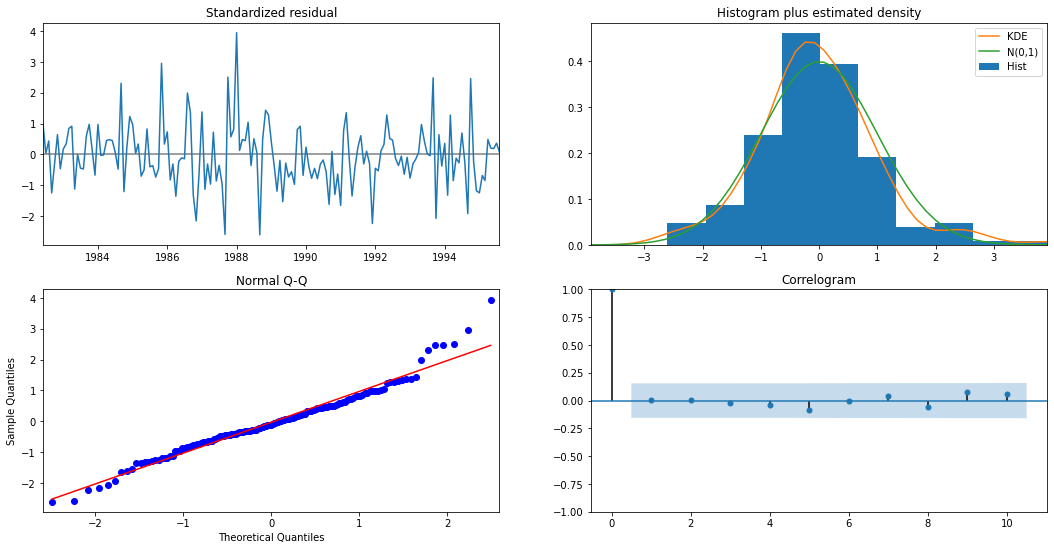

In [208]:
results_full_data_model.plot_diagnostics();

<font color='purple'/><span style="font-family:Perpetua Titling MT; font-size:1.3em;"><U/><B/>Evaluate the model on the whole and predict 12 months into the future with appropriate confidence intervals/bands.

In [209]:
predicted_manual_SARIMA_6_full_data = results_full_data_model.get_forecast(steps=12)

In [210]:
predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).head()

Sparkling          mean     mean_se  mean_ci_lower  mean_ci_upper
1995-08-31  1836.284528  379.678245    1092.128843    2580.440213
1995-09-30  2489.836567  384.440374    1736.347279    3243.325855
1995-10-31  3324.310938  384.545466    2570.615675    4078.006201
1995-11-30  4020.404421  386.303564    3263.263349    4777.545493
1995-12-31  6289.387476  386.358470    5532.138789    7046.636162

In [211]:
rmse = mean_squared_error(df['Sparkling'],results_full_data_model.fittedvalues,squared=False)
print('RMSE of the Full Model',rmse)

RMSE of the Full Model 536.947480829063


In [212]:
pred_full_manual_SARIMA_date = predicted_manual_SARIMA_6_full_data.summary_frame(alpha=0.05).set_index(pd.date_range(start='1995-07-31',end='1996-06-30', freq='M'))

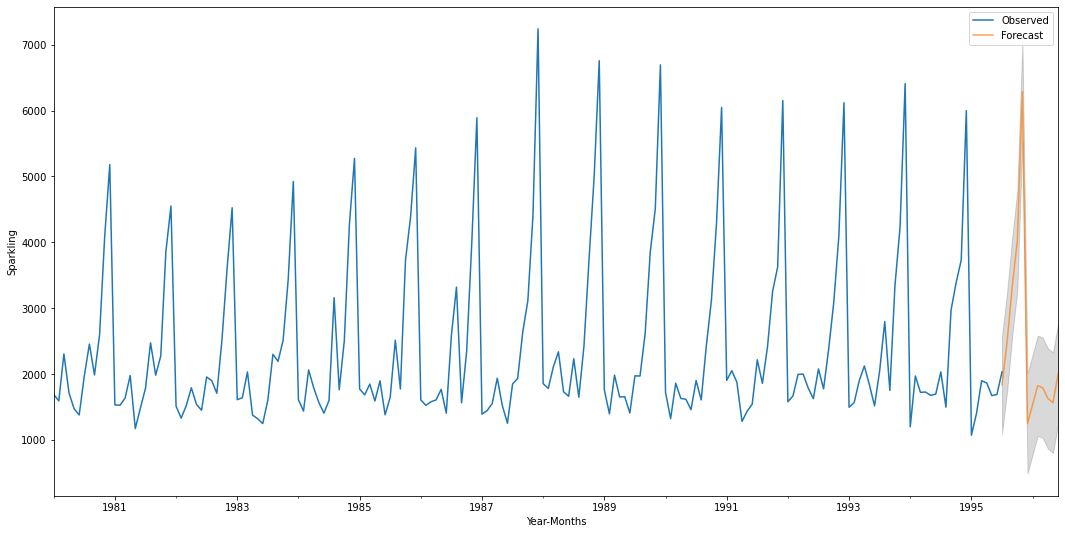

In [213]:
axis = df['Sparkling'].plot(label='Observed')
pred_full_manual_SARIMA_date['mean'].plot(ax=axis, label='Forecast', alpha=0.7)
axis.fill_between(pred_full_manual_SARIMA_date.index, pred_full_manual_SARIMA_date['mean_ci_lower'], 
                  pred_full_manual_SARIMA_date['mean_ci_upper'], color='k', alpha=.15)
axis.set_xlabel('Year-Months')
axis.set_ylabel('Sparkling')
plt.legend(loc='best')
plt.show()

In [205]:
resultsDf

Method    Test_RMSE  Test_MAPE
0                RegressionOnTime  1389.135000     50.150
0        RegressionOnTimeSeasonal  1389.135000     50.150
0                     Naive model  3864.279000    152.870
0                  Simple Average  1275.082000     38.900
0           moving_avg_forecast_4  1156.590000   1156.590
0           moving_avg_forecast_6  1283.927000   1283.927
0           moving_avg_forecast_8  1342.568000   1342.568
0          moving_avg_forecast_12  1267.925000   1267.925
0                             SES  1275.081766     38.900
0                     Holt_linear  3850.940953    152.060
0                     Holt_Winter   362.728645     12.080
0                   Holt_Winter M   383.165741     11.910
0                       Brown SES   383.165741     11.910
0                   ARIMA (2,1,2)  1375.036299        NaN
0                   ARIMA (1,1,1)  1461.666400        NaN
0          SARIMA(1,1,2)(2,0,2,6)   626.929531        NaN
0   SARIMA(1, 1, 2)x(1, 0, 2, 12)   528.579498        NaN
0  SARIMAX(1, 1, 1)x(1, 0, 1, 12)   582.025730        NaN

In [206]:
resultsDf.sort_values(by='Test_RMSE',ascending=True)

Method    Test_RMSE  Test_MAPE
0                     Holt_Winter   362.728645     12.080
0                       Brown SES   383.165741     11.910
0                   Holt_Winter M   383.165741     11.910
0   SARIMA(1, 1, 2)x(1, 0, 2, 12)   528.579498        NaN
0  SARIMAX(1, 1, 1)x(1, 0, 1, 12)   582.025730        NaN
0          SARIMA(1,1,2)(2,0,2,6)   626.929531        NaN
0           moving_avg_forecast_4  1156.590000   1156.590
0          moving_avg_forecast_12  1267.925000   1267.925
0                             SES  1275.081766     38.900
0                  Simple Average  1275.082000     38.900
0           moving_avg_forecast_6  1283.927000   1283.927
0           moving_avg_forecast_8  1342.568000   1342.568
0                   ARIMA (2,1,2)  1375.036299        NaN
0        RegressionOnTimeSeasonal  1389.135000     50.150
0                RegressionOnTime  1389.135000     50.150
0                   ARIMA (1,1,1)  1461.666400        NaN
0                     Holt_linear  3850.940953    152.060
0                     Naive model  3864.279000    152.870